In [1]:
# First the import all package's
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory  as ff

In [3]:
# The load the dataset and read the file
Load_data = pd.read_csv("classification_data.csv")

In [4]:
Load_data

count_session  count_hit channelGrouping  totals_newVisits  \
0                  9       1194         (Other)                 0   
1                  9       1194         (Other)                 0   
2                 28       1816     Paid Search                 0   
3                  2        299     Paid Search                 0   
4                  2        299     Paid Search                 0   
...              ...        ...             ...               ...   
99995             58      12340     Paid Search                 0   
99996             58      12340     Paid Search                 0   
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
0      GoogleAnalytics                Android             True   
1      GoogleAnalytics                Android             True   
2      GoogleAnalytics                Android             True   
3      GoogleAnalytics                Android             True   
4      GoogleAnalytics                Android             True   
...                ...                    ...              ...   
99995  GoogleAnalytics                    iOS             True   
99996  GoogleAnalytics                    iOS             True   
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                    mobile           Sharjah              25.3463  ...   
1                    mobile           Sharjah              25.3463  ...   
2                    mobile             Ajman              25.4052  ...   
3                    mobile         Abu Dhabi              24.4539  ...   
4                    mobile         Abu Dhabi              24.4539  ...   
...                     ...               ...                  ...  ...   
99995                mobile             Dubai              25.2048  ...   
99996                mobile             Dubai              25.2048  ...   
99997                mobile             Dubai              25.2048  ...   
99998                mobile             Dubai              25.2048  ...   
99999                mobile             Dubai              25.2048  ...   

                    latest_keyword  earliest_isTrueDirect  \
0                        (not set)                   True   
1                        (not set)                   True   
2             (automatic matching)                   True   
3      custom0==marketplace&+id==*                   True   
4      custom0==marketplace&+id==*                   True   
...                            ...                    ...   
99995  custom0==marketplace&+id==*                   True   
99996  custom0==marketplace&+id==*                   True   
99997  custom0==marketplace&+id==*                   True   
99998  custom0==marketplace&+id==*                   True   
99999  custom0==marketplace&+id==*                   True   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                     True              1900        0          5617   
1                     True              1900        0          5617   
2                     True              3843        0         77417   
3                     True               592        0          1576   
4                     True               592        0          1576   
...                    ...               ...      ...           ...   
99995                 True             34999        0             0   
99996                 True             34999        0             0   
99997                 True             34999        0             0   
99998                 True             34

In [5]:
Load_data['visits_per_day']

0         66.333333
1         66.333333
2         73.480000
3         37.375000
4         37.375000
            ...    
99995    398.064516
99996    398.064516
99997    398.064516
99998    398.064516
99999    398.064516
Name: visits_per_day, Length: 100000, dtype: float64

In [6]:
Load_data.shape

(100000, 46)

In [7]:
Load_data['has_converted'].value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [8]:
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [9]:
Load_data.value_counts().sum()

100000

In [10]:
Load_data.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [11]:
Load_data.duplicated().sum()

90793

In [12]:
Load_data.drop_duplicates(inplace=True)

In [13]:
Load_data

count_session  count_hit channelGrouping  totals_newVisits  \
0                  9       1194         (Other)                 0   
2                 28       1816     Paid Search                 0   
3                  2        299     Paid Search                 0   
16                 3        507     Paid Search                 0   
20                 9       1037     Paid Search                 0   
...              ...        ...             ...               ...   
99888              1        195     Paid Search                 0   
99907             28       3071     Paid Search                 0   
99908              7       1018     Paid Search                 0   
99921              6        818     Paid Search                 0   
99934             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
0      GoogleAnalytics                Android             True   
2      GoogleAnalytics                Android             True   
3      GoogleAnalytics                Android             True   
16     GoogleAnalytics                    iOS             True   
20     GoogleAnalytics                Android             True   
...                ...                    ...              ...   
99888  GoogleAnalytics                    iOS             True   
99907  GoogleAnalytics                Android             True   
99908  GoogleAnalytics                    iOS             True   
99921  GoogleAnalytics                Android             True   
99934  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                    mobile           Sharjah              25.3463  ...   
2                    mobile             Ajman              25.4052  ...   
3                    mobile         Abu Dhabi              24.4539  ...   
16                   mobile         Abu Dhabi              24.4539  ...   
20                   mobile             Dubai              25.2048  ...   
...                     ...               ...                  ...  ...   
99888                mobile         Abu Dhabi              24.4539  ...   
99907                mobile         Abu Dhabi              24.4539  ...   
99908                mobile             Dubai              25.2048  ...   
99921                mobile             Dubai              25.2048  ...   
99934                mobile             Dubai              25.2048  ...   

                    latest_keyword  earliest_isTrueDirect  \
0                        (not set)                   True   
2             (automatic matching)                   True   
3      custom0==marketplace&+id==*                   True   
16            custom0==marketplace                   True   
20                       (not set)                   True   
...                            ...                    ...   
99888                    carrefour                   True   
99907         custom0==marketplace                   True   
99908         custom0==marketplace                   True   
99921             OJ2c1OnsSm5Ghzab                   True   
99934  custom0==marketplace&+id==*                   True   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                     True              1900        0          5617   
2                     True              3843        0         77417   
3                     True               592        0          1576   
16                    True               507        0          1958   
20                    True              1674        0        138440   
...                    ...               ...      ...           ...   
99888                 True               471        0           278   
99907                 True              4071        0          3810   
99908                 True              7258        0             0   
99921                 True               

In [14]:
Load_data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [15]:
for i in Load_data.columns:
    if Load_data[i].dtype == "object":
        print(f"column name : {i}")
        print(Load_data[i].value_counts())
        print("-------")

column name : channelGrouping
channelGrouping
Paid Search    8021
Display        1185
(Other)           1
Name: count, dtype: int64
-------
column name : device_browser
device_browser
GoogleAnalytics      8437
Chrome                547
Safari                143
Edge                   28
Samsung Internet       24
Firefox                23
Android Webview         3
Opera                   1
Apache-HttpClient       1
Name: count, dtype: int64
-------
column name : device_operatingSystem
device_operatingSystem
Android      4796
iOS          3874
Windows       429
Macintosh     102
Chrome OS       3
Linux           2
(not set)       1
Name: count, dtype: int64
-------
column name : device_deviceCategory
device_deviceCategory
mobile     8603
desktop     567
tablet       37
Name: count, dtype: int64
-------
column name : geoNetwork_region
geoNetwork_region
Dubai                  5187
Abu Dhabi              2660
Sharjah                 708
Ajman                   316
Ras al Khaimah          10

In [16]:
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   int64  
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   bool   
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  youtube                 9207 non-null   int64  
 14  avg_session_time        9207 non-null   floa

In [17]:
Load_data.drop("target_date",axis=1,inplace=True)

In [18]:
Load_data.describe()

count_session     count_hit  totals_newVisits  geoNetwork_latitude  \
count    9207.000000   9207.000000       9207.000000          9207.000000   
mean       19.908005   2489.793853          0.012382            24.887025   
std        21.059017   3399.778210          0.110589             3.414327   
min         1.000000      2.000000          0.000000           -33.924900   
25%         7.000000    525.000000          0.000000            24.453900   
50%        14.000000   1347.000000          0.000000            25.204800   
75%        26.000000   3149.000000          0.000000            25.204800   
max       270.000000  48744.000000          1.000000            59.329300   

       geoNetwork_longitude  historic_session  historic_session_page  youtube  \
count           9207.000000       9207.000000            9207.000000   9207.0   
mean              54.271322       8449.205061            1807.767785      0.0   
std                8.852935      10945.490675            4143.496795      0.0   
min              -87.629800          2.000000               0.000000      0.0   
25%               54.377300       2049.000000               0.000000      0.0   
50%               55.270800       4923.000000               0.000000      0.0   
75%               55.270800      10538.000000            2008.500000      0.0   
max              140.318700     181715.000000           99896.000000      0.0   

       avg_session_time  avg_session_time_page  ...  avg_visit_time  \
count       9207.000000            9207.000000  ...     9207.000000   
mean         469.237063             164.288173  ...       12.459433   
std          434.281188             420.842074  ...        3.116302   
min            2.000000               0.000000  ...        0.000000   
25%          221.053977               0.000000  ...       10.000000   
50%          360.000000               0.000000  ...       12.000000   
75%          576.293846             135.815657  ...       14.000000   
max         5441.000000            5441.000000  ...       23.000000   

       days_since_last_visit  days_since_first_visit  visits_per_day  \
count                 9207.0             9207.000000     9207.000000   
mean                     0.0               22.759748      114.390833   
std                      0.0                8.951171      136.507190   
min                      0.0                0.000000        0.923077   
25%                      0.0               20.000000       34.042445   
50%                      0.0               27.000000       71.050000   
75%                      0.0               29.000000      142.363095   
max                      0.0               30.000000     2397.333333   

       bounce_rate  num_interactions      bounces  time_on_site  \
count  9207.000000       9207.000000  9207.000000  9.207000e+03   
mean      0.013380       8871.946562     0.006625  1.579085e+04   
std       0.115175      12445.373787     0.216773  4.955897e+04   
min       0.000000         20.000000     0.000000  0.000000e+00   
25%       0.000000       1551.000000     0.000000  6.115000e+02   
50%       0.000000       4529.000000     0.000000  2.712000e+03   
75%       0.000000      11295.000000     0.000000  1.102800e+04   
max       4.670000     197630.000000    14.000000  1.250267e+06   

       transactionRevenue  has_converted  
count        9.207000e+03    9207.000000  
mean         1.900626e+08       0.416314  
std          6.639662e+08       0.492974  
min          0.000000e+00       0.000000  
25%          0.000000e+00       0.000000  
50%          1.744101e+07       0.000000  
75%          1.228885e+08       1.000000  
max          1.546412e+10       1.000000  

[8 rows x 30 columns]

In [19]:
for column in Load_data.columns:
    if Load_data[column].dtype == 'int64':
        print(column)

count_session
count_hit
totals_newVisits
historic_session
historic_session_page
youtube
sessionQualityDim
last_visitId
latest_visit_id
visitId_threshold
earliest_visit_id
earliest_visit_number
latest_visit_number
avg_visit_time
days_since_last_visit
days_since_first_visit
num_interactions
bounces
time_on_site
transactionRevenue
has_converted


In [20]:
corr_data = Load_data[['count_session','count_hit','totals_newVisits','historic_session','historic_session_page','youtube','sessionQualityDim','last_visitId','latest_visit_id','visitId_threshold','earliest_visit_id','earliest_visit_number','latest_visit_number','avg_visit_time','days_since_last_visit','days_since_first_visit','num_interactions','bounces','time_on_site','transactionRevenue','has_converted']]

In [21]:
corr_data.corr()

count_session  count_hit  totals_newVisits  \
count_session                1.000000   0.856096         -0.088877   
count_hit                    0.856096   1.000000         -0.075445   
totals_newVisits            -0.088877  -0.075445          1.000000   
historic_session             0.839461   0.710085         -0.055747   
historic_session_page        0.238499   0.065334          0.025152   
youtube                           NaN        NaN               NaN   
sessionQualityDim           -0.100385  -0.138287          0.138650   
last_visitId                 0.203082   0.175670         -0.082202   
latest_visit_id              0.203082   0.175670         -0.082202   
visitId_threshold            0.203082   0.175670         -0.082202   
earliest_visit_id           -0.050703  -0.029274          0.036727   
earliest_visit_number        0.239890   0.111591         -0.064366   
latest_visit_number          0.067875   0.035356         -0.008286   
avg_visit_time              -0.019165   0.000390         -0.063157   
days_since_last_visit             NaN        NaN               NaN   
days_since_first_visit       0.419399   0.339041         -0.197477   
num_interactions             0.760016   0.871843         -0.071458   
bounces                      0.044868   0.051623         -0.003422   
time_on_site                 0.153830   0.093644         -0.010688   
transactionRevenue           0.091560   0.088279         -0.013183   
has_converted                0.100391   0.228865         -0.036781   

                        historic_session  historic_session_page  youtube  \
count_session                   0.839461               0.238499      NaN   
count_hit                       0.710085               0.065334      NaN   
totals_newVisits               -0.055747               0.025152      NaN   
historic_session                1.000000               0.516135      NaN   
historic_session_page           0.516135               1.000000      NaN   
youtube                              NaN                    NaN      NaN   
sessionQualityDim               0.093970               0.264867      NaN   
last_visitId                    0.176316               0.083348      NaN   
latest_visit_id                 0.176316               0.083348      NaN   
visitId_threshold               0.176316               0.083348      NaN   
earliest_visit_id              -0.007381               0.027513      NaN   
earliest_visit_number           0.213574               0.065062      NaN   
latest_visit_number             0.055688               0.024868      NaN   
avg_visit_time                 -0.029022              -0.077071      NaN   
days_since_last_visit                NaN                    NaN      NaN   
days_since_first_visit          0.304497               0.093994      NaN   
num_interactions                0.591934               0.056213      NaN   
bounces                         0.025395               0.018425      NaN   
time_on_site                    0.277284               0.236808      NaN   
transactionRevenue              0.110356               0.127642      NaN   
has_converted                  -0.022891              -0.139600      NaN   

                        sessionQualityDim  last_visitId  latest_visit_id  \
count_session                   -0.100385      0.203082         0.203082   
count_hit                       -0.138287      0.175670         0.175670   
totals_newVisits                 0.138650     -0.082202        -0.082202   
historic_session                 0.093970      0.176316         0.176316   
historic_session_page            0.264867      0.083348         0.083348   
youtube                               NaN           NaN              NaN   
sessionQualityDim                1.000000     -0.042713        -0.042713   
last_visitId                    -0.042713      1.000000         1.000000   
latest_visit_id                 -0.042713      1.000000         1.000000   
visitId_threshold               -0.042713      1.0

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

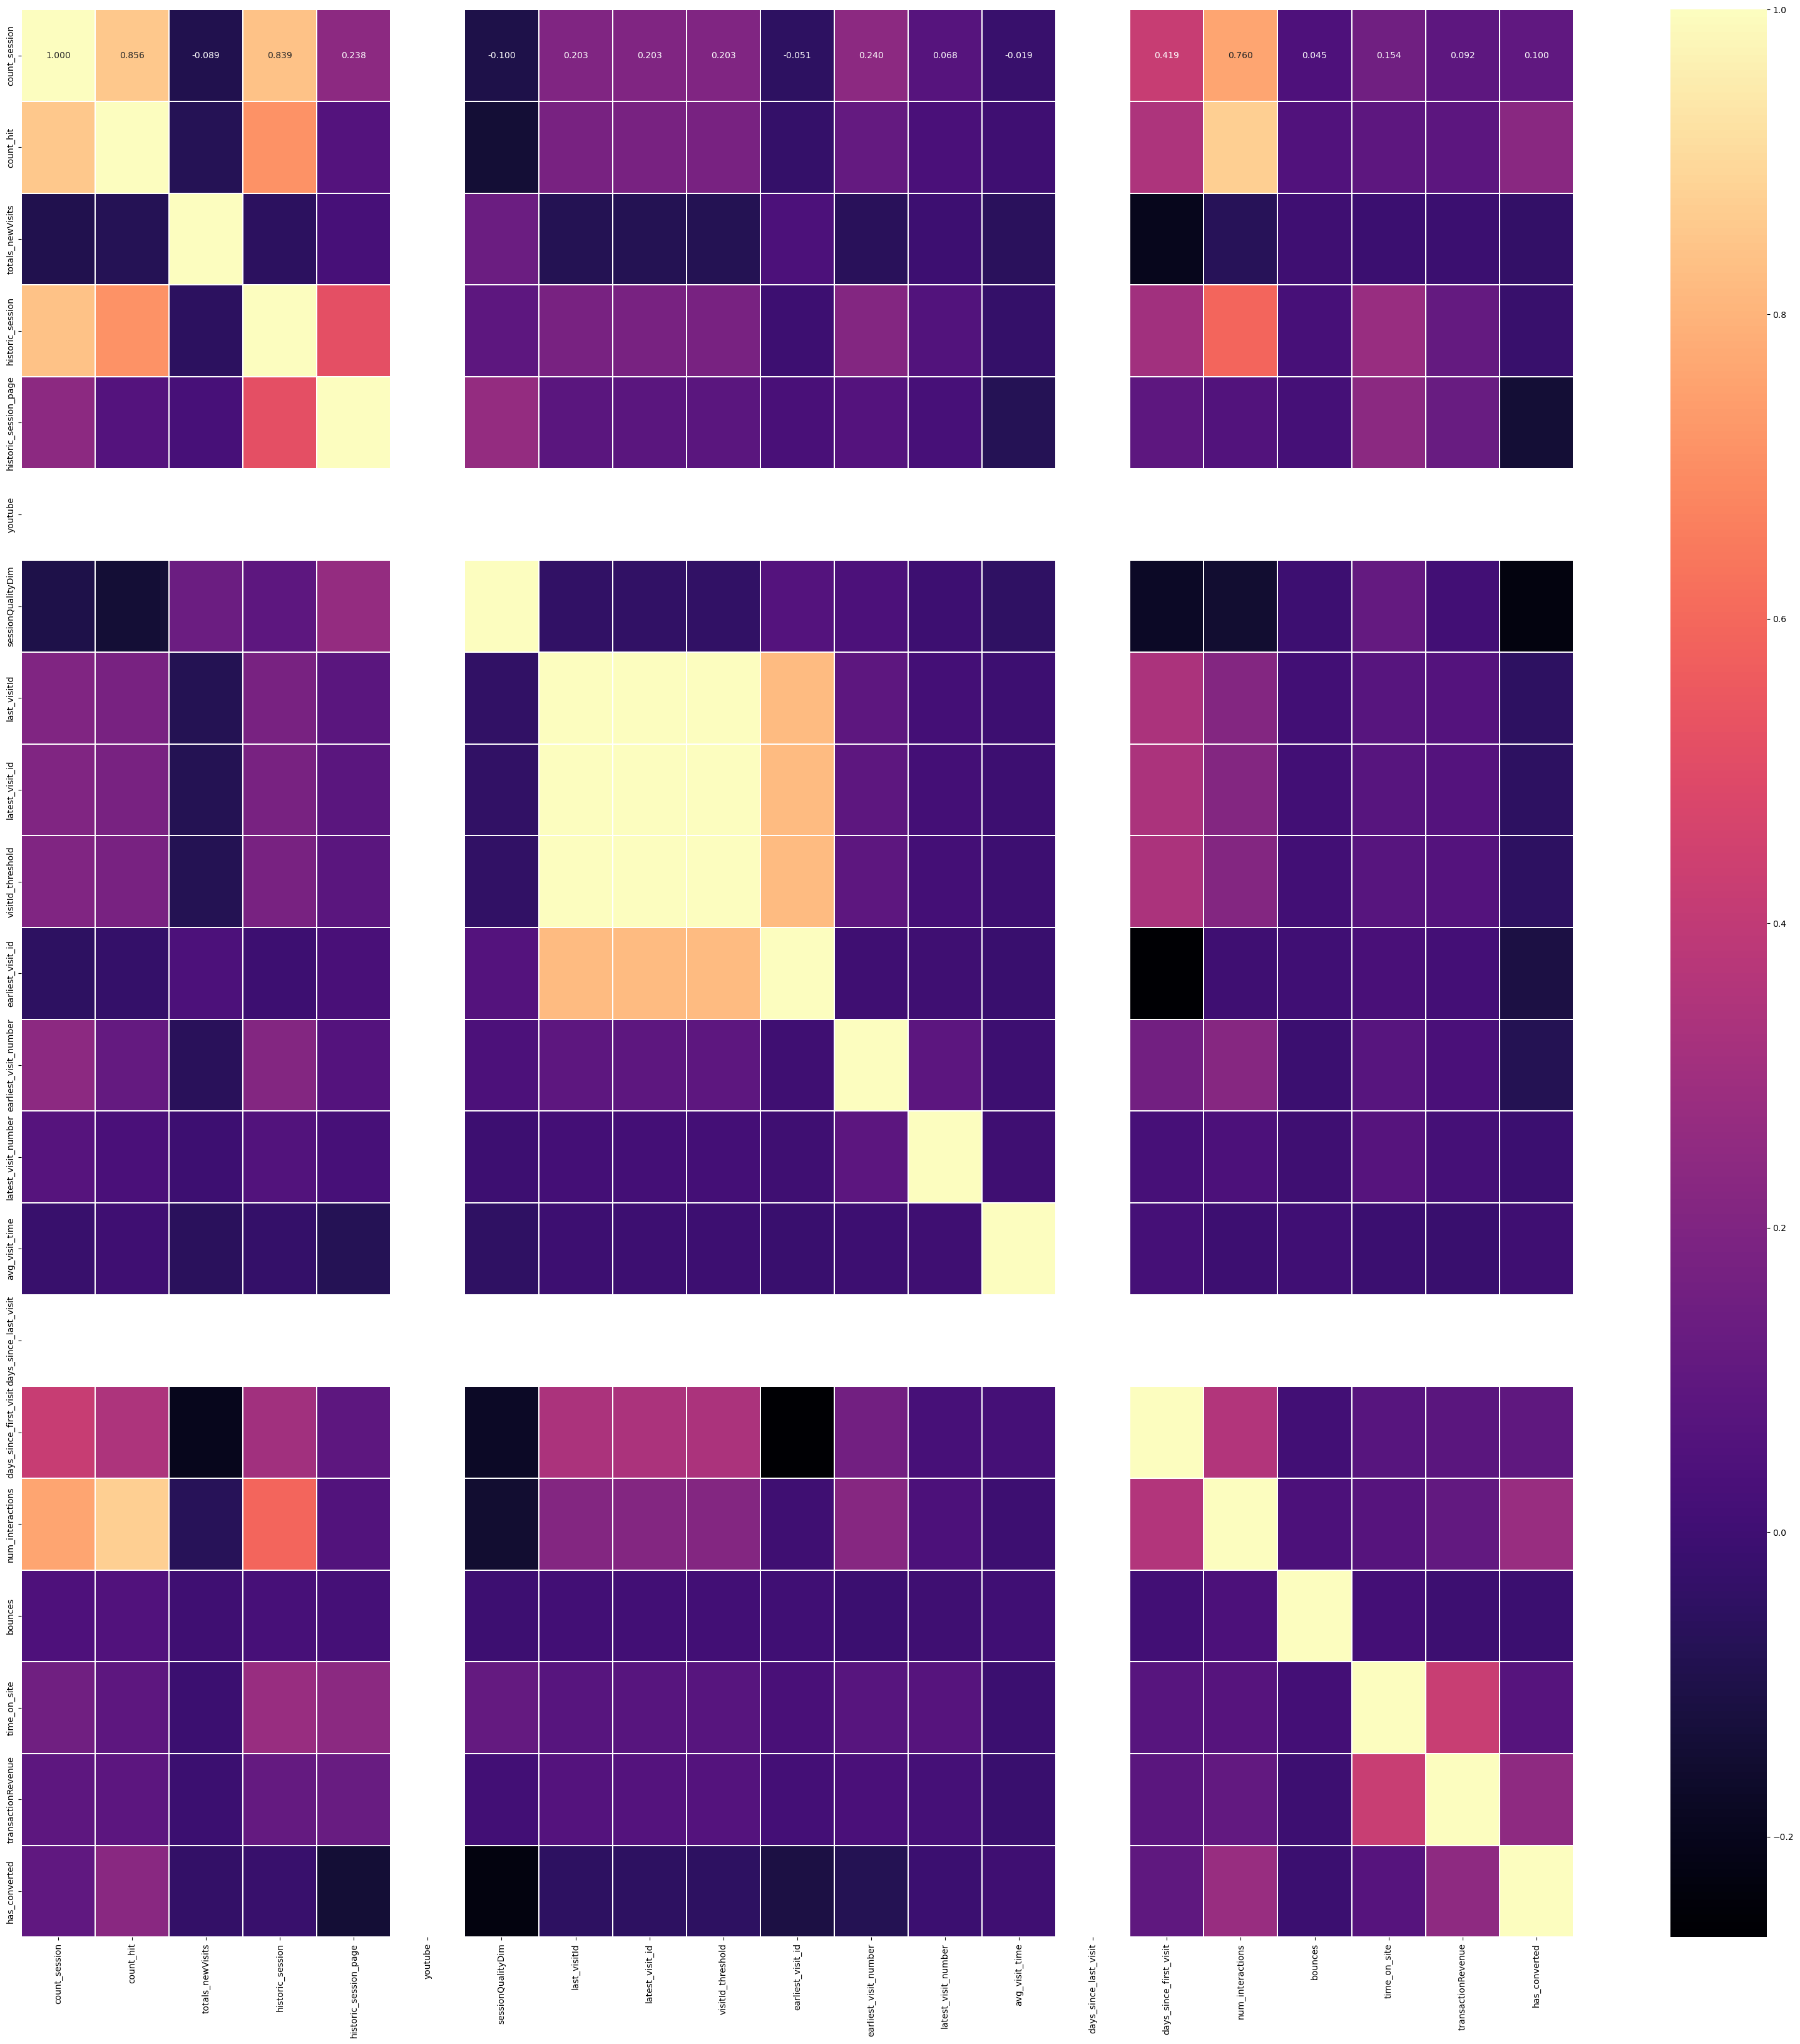

In [22]:
fig,ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_data.corr(),annot=True,ax=ax, linewidths=0.05,fmt=".3f",cmap="magma")

In [23]:
Load_data.drop(["latest_visit_id","visitId_threshold"],axis=1,inplace=True)

In [24]:
Load_data.shape

(9207, 43)

In [25]:
load_data = []
for i in Load_data.columns:
    if Load_data[i].dtype != "object":
        load_data.append(i)

In [26]:
load_data

['count_session',
 'count_hit',
 'totals_newVisits',
 'device_isMobile',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'historic_session',
 'historic_session_page',
 'youtube',
 'avg_session_time',
 'avg_session_time_page',
 'single_page_rate',
 'sessionQualityDim',
 'last_visitId',
 'earliest_visit_id',
 'earliest_visit_number',
 'latest_visit_number',
 'time_earliest_visit',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'transactionRevenue',
 'has_converted']

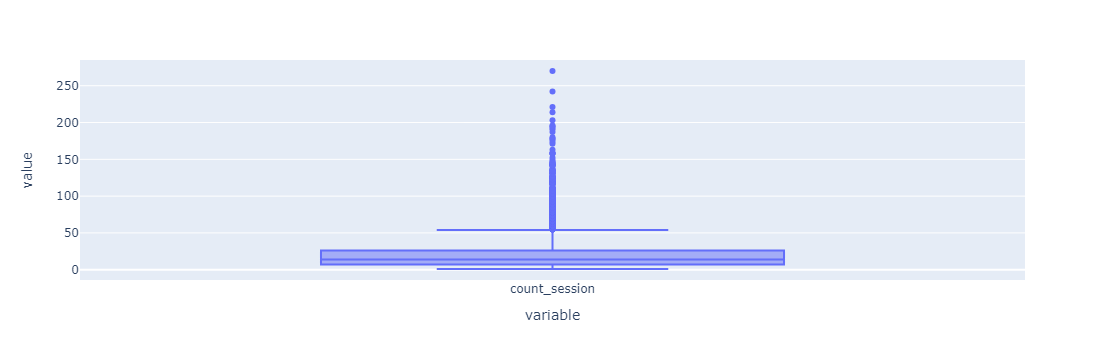

In [27]:
px.box(Load_data["count_session"])

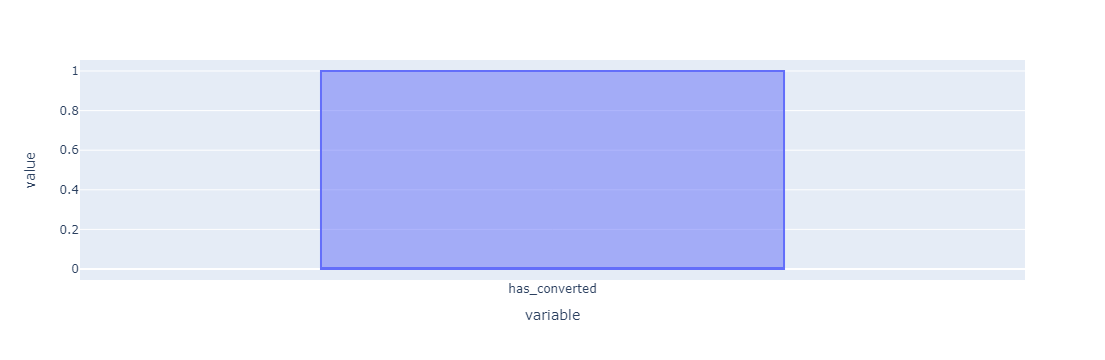

In [28]:
px.box(Load_data['has_converted'])

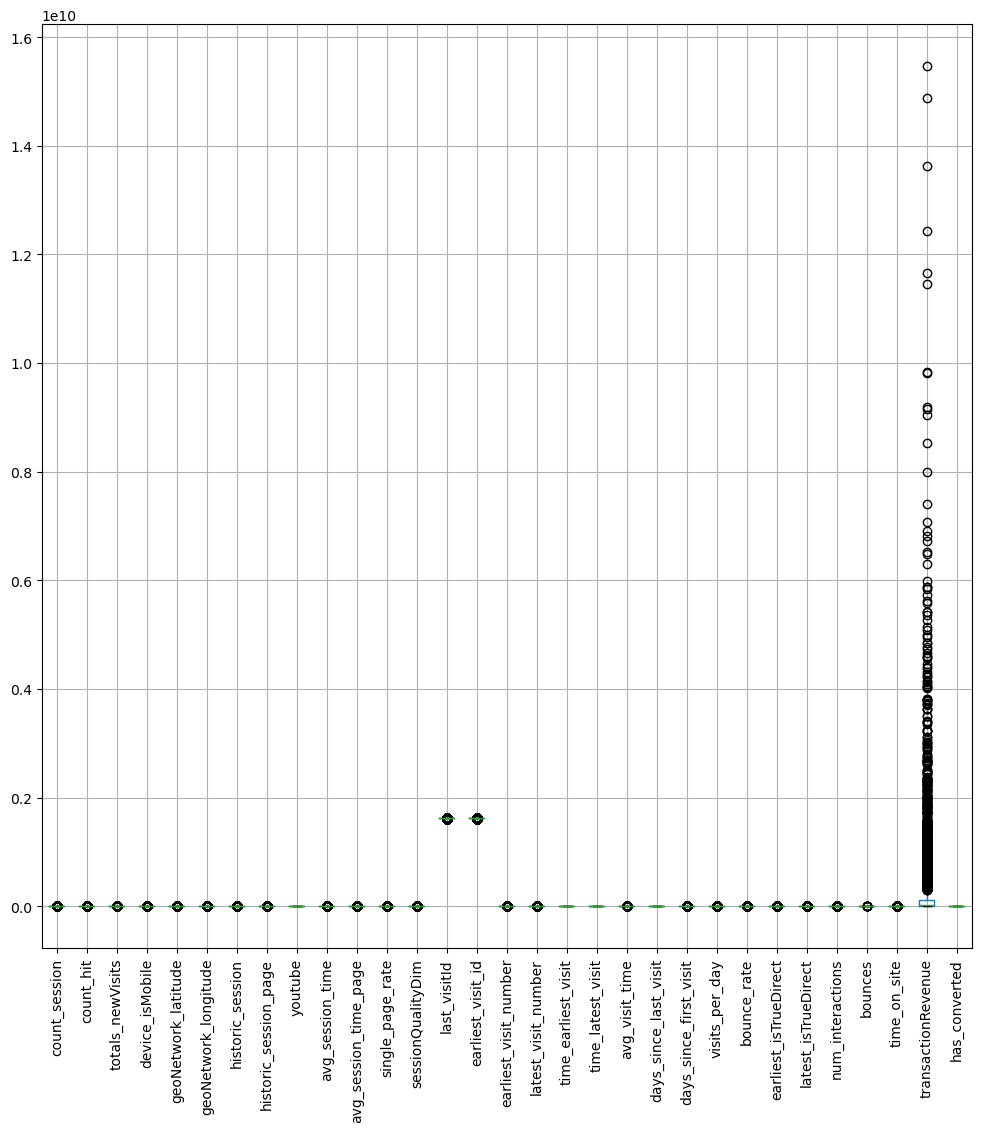

In [29]:
Load_data.boxplot(figsize=(12,12))
plt.xticks(rotation=90)
plt.show()

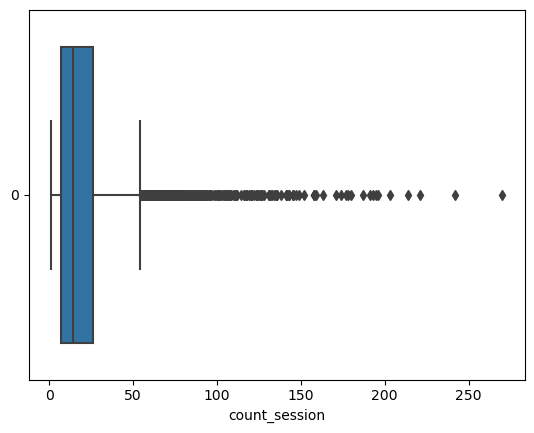

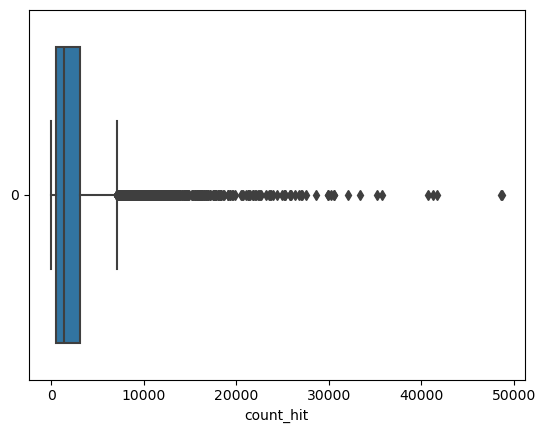

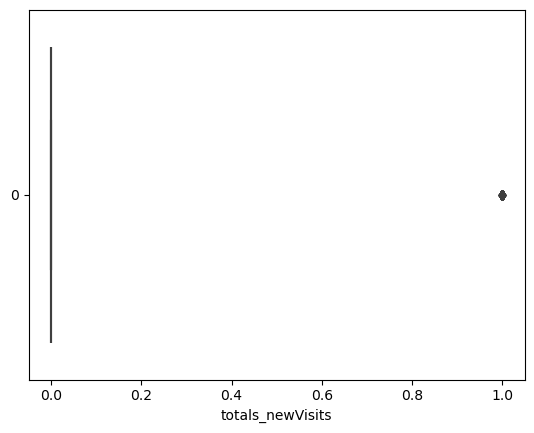

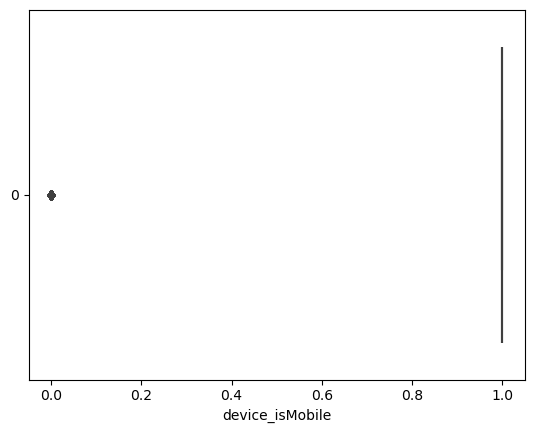

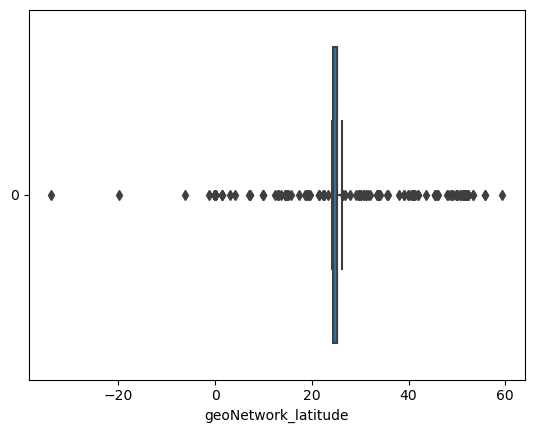

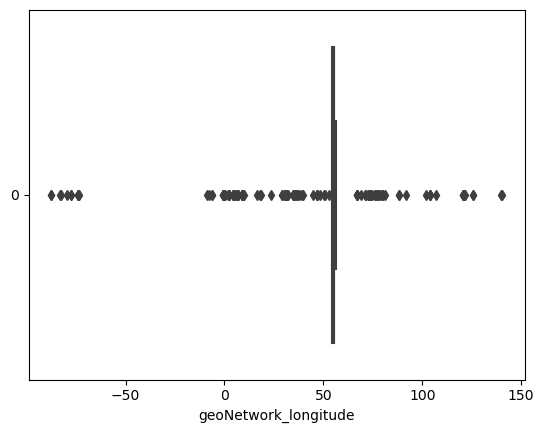

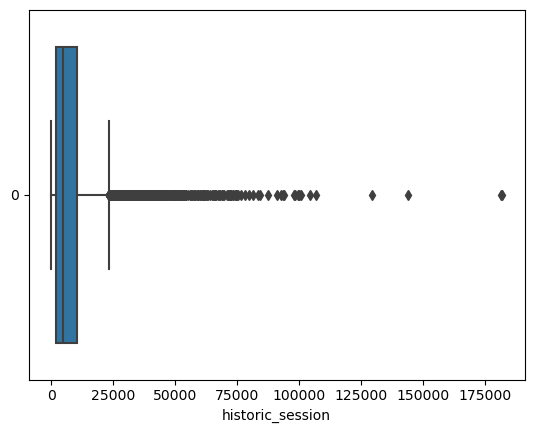

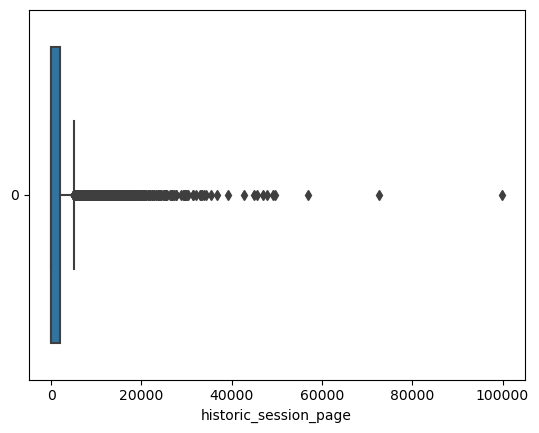

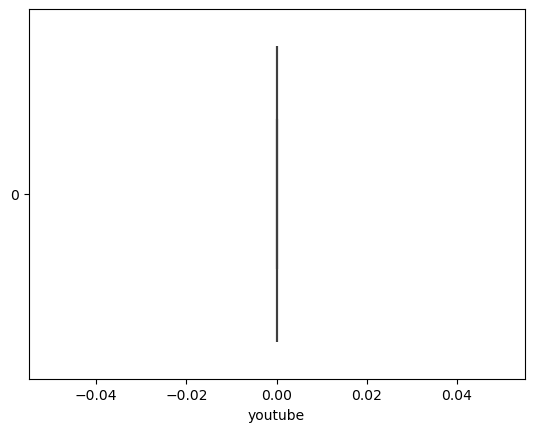

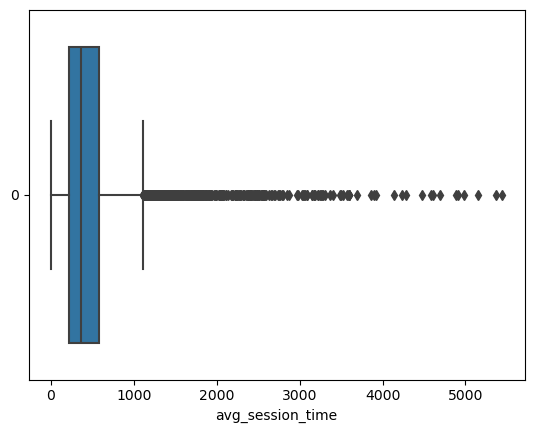

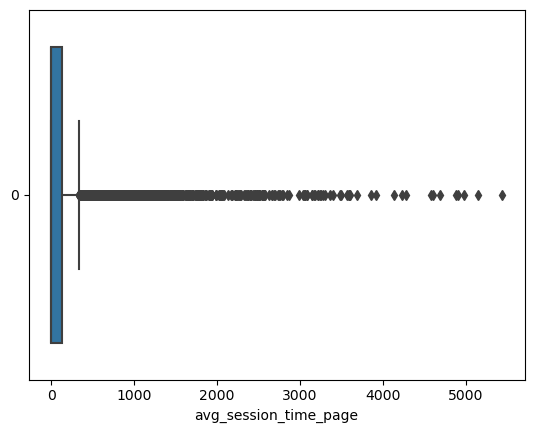

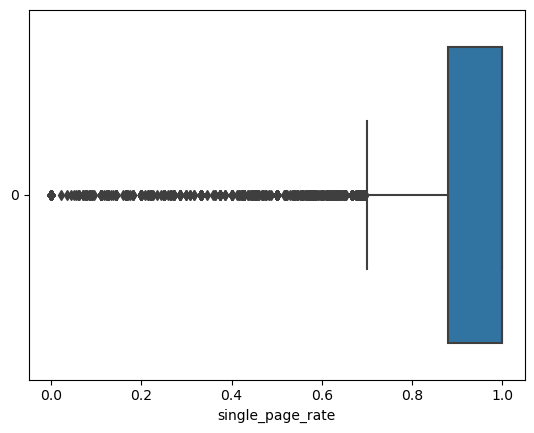

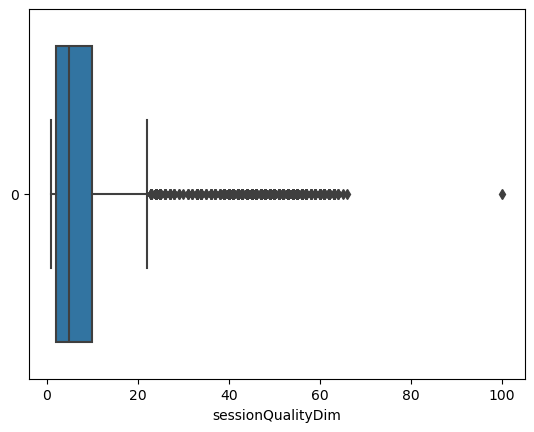

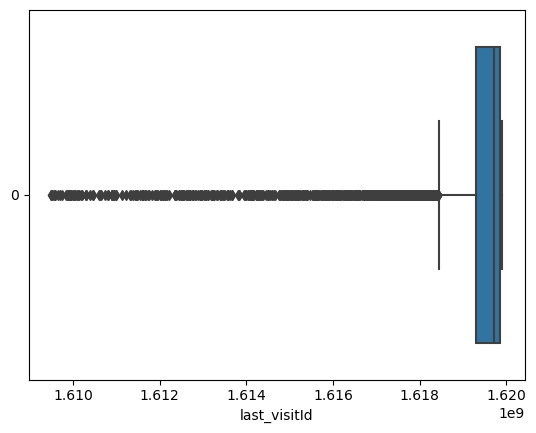

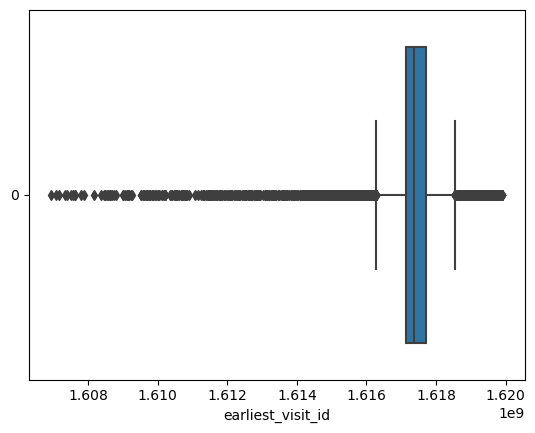

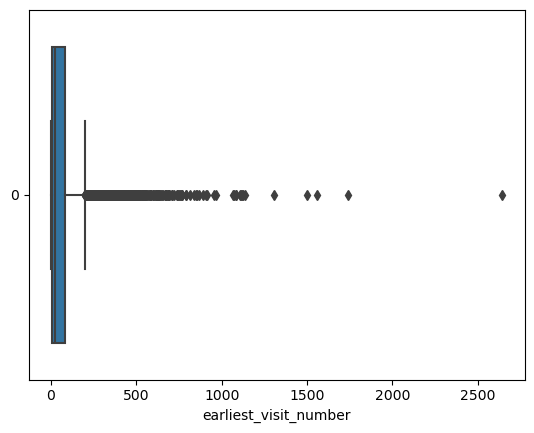

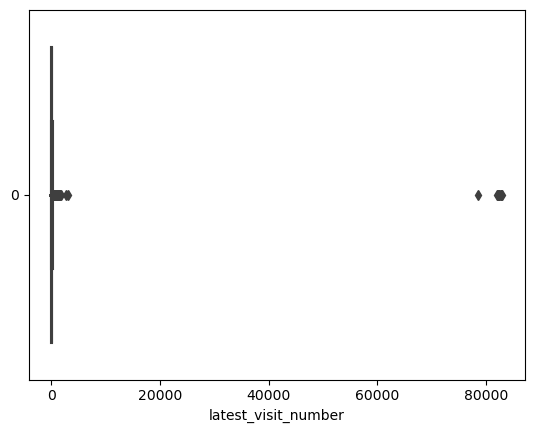

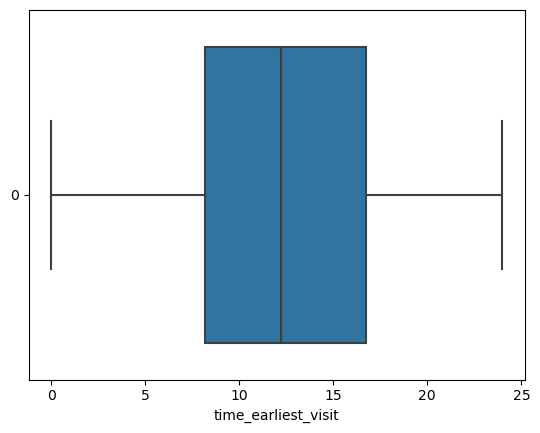

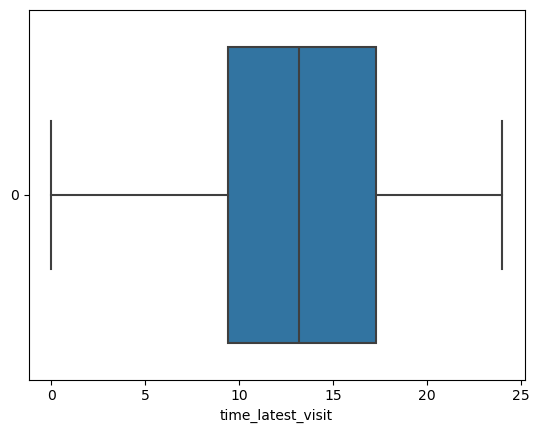

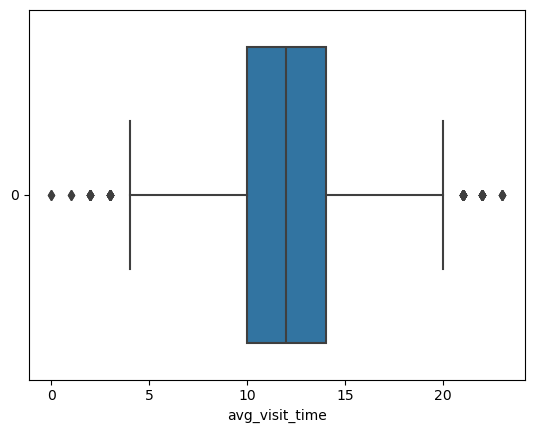

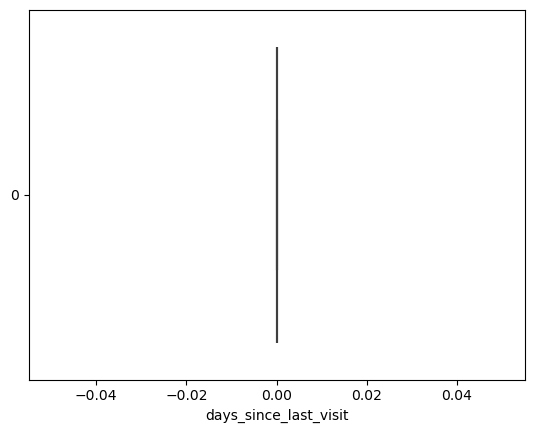

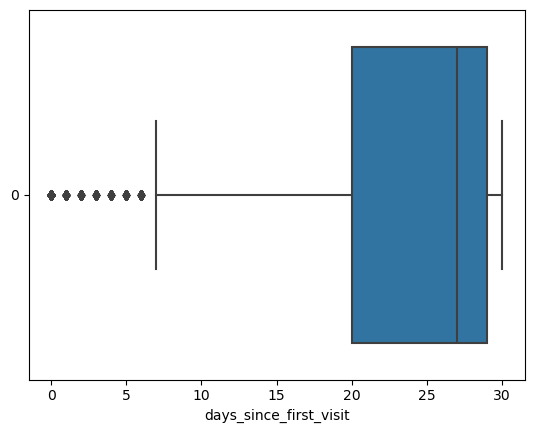

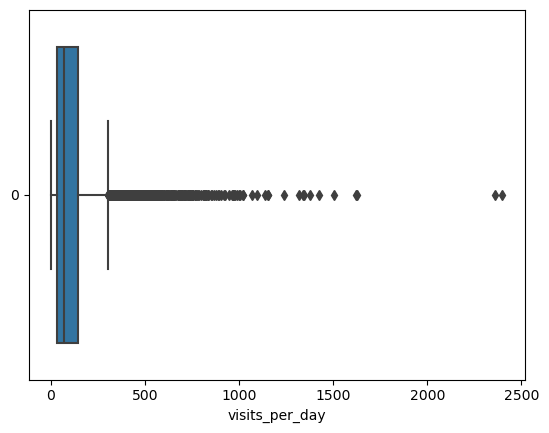

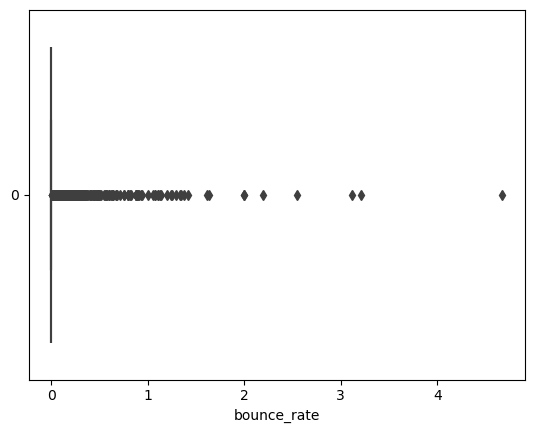

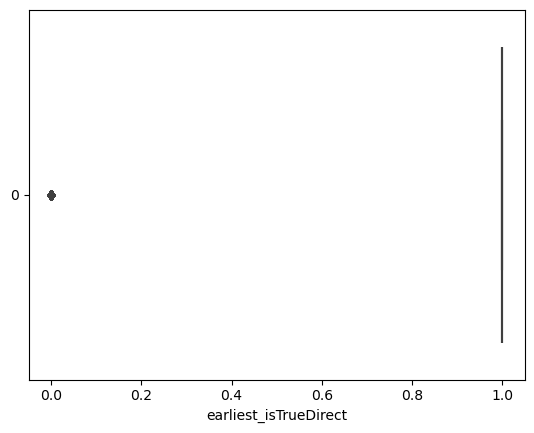

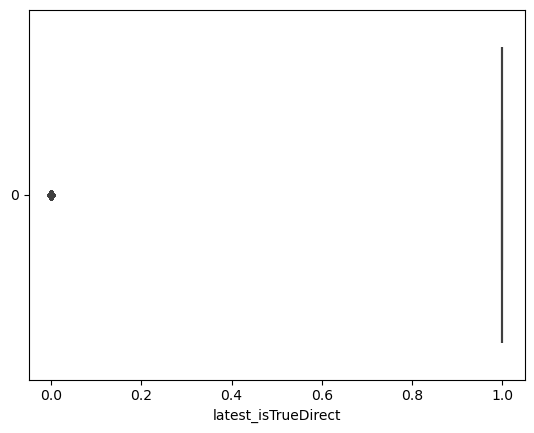

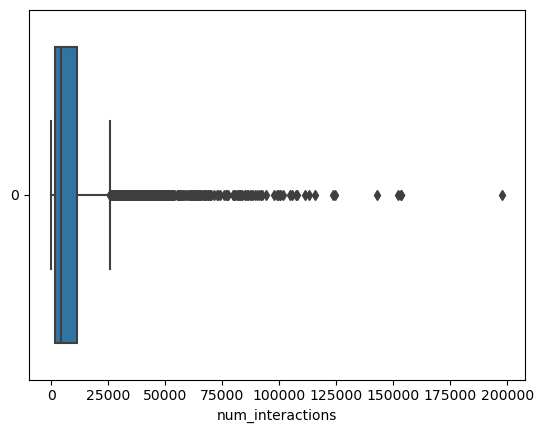

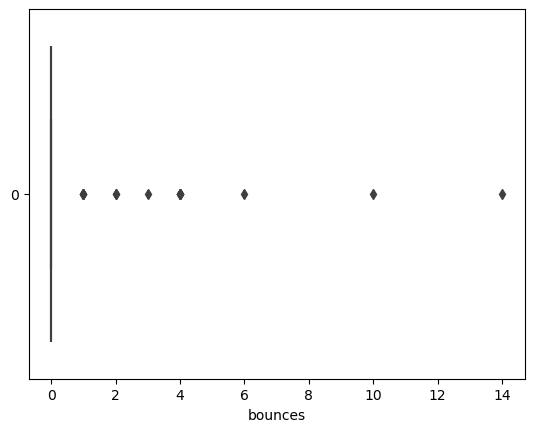

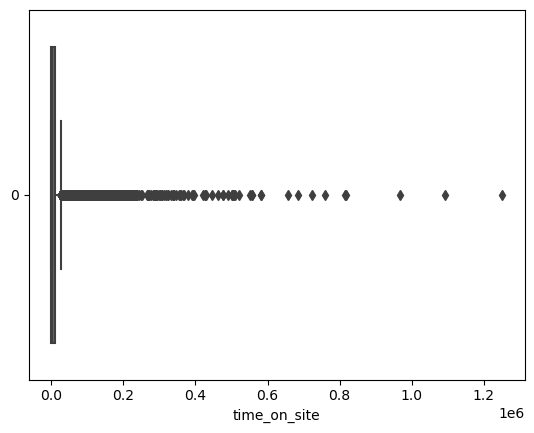

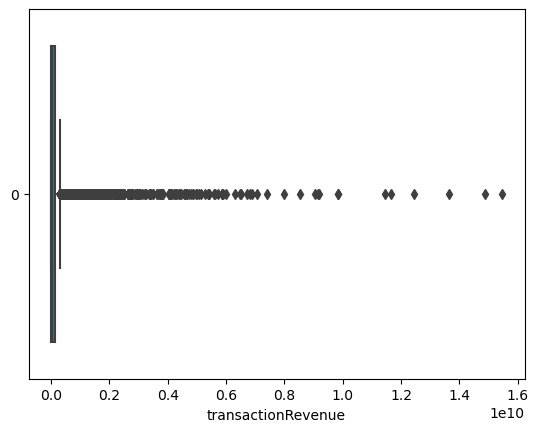

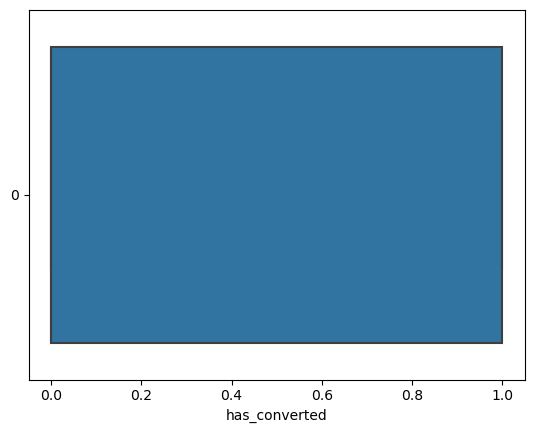

In [30]:
for i in range(len(load_data)):
    sns.boxplot(Load_data[load_data[i]],orient="h")
    plt.xlabel(load_data[i])
    plt.show()

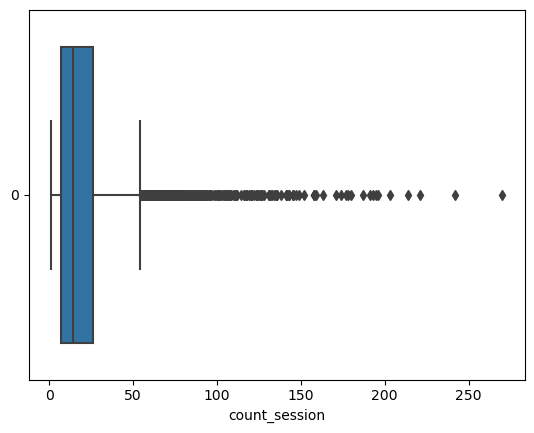

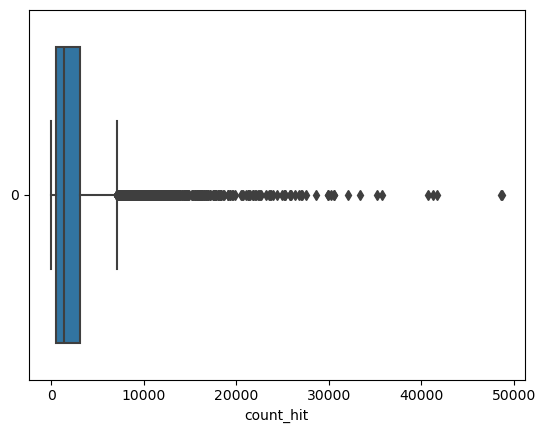

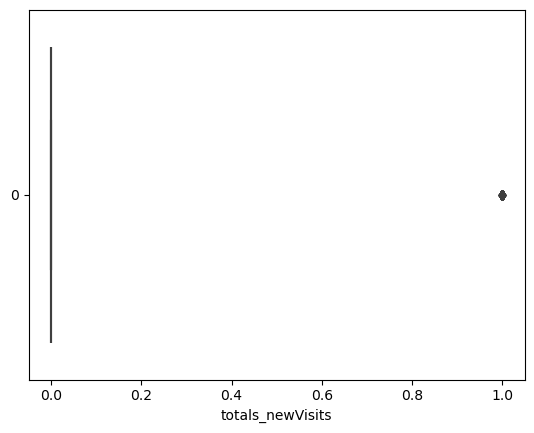

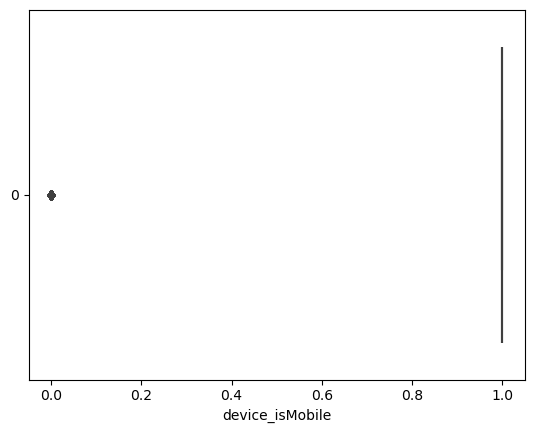

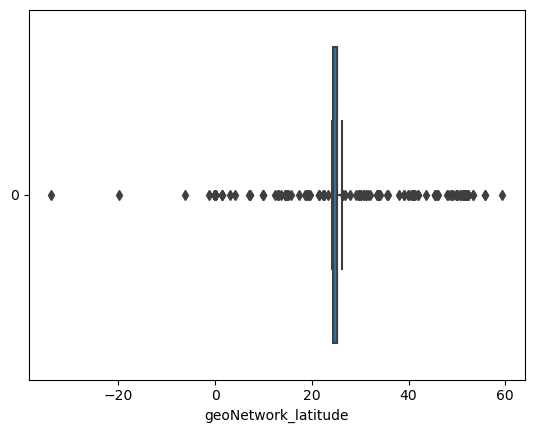

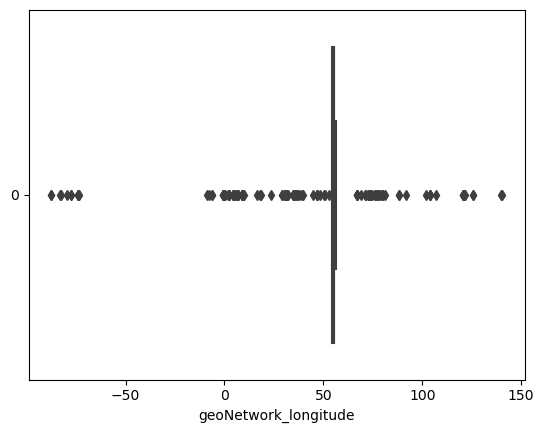

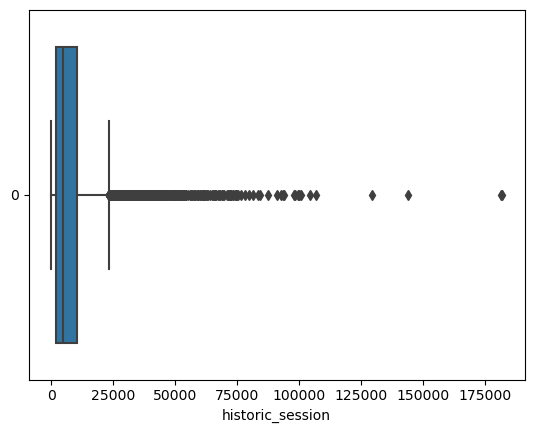

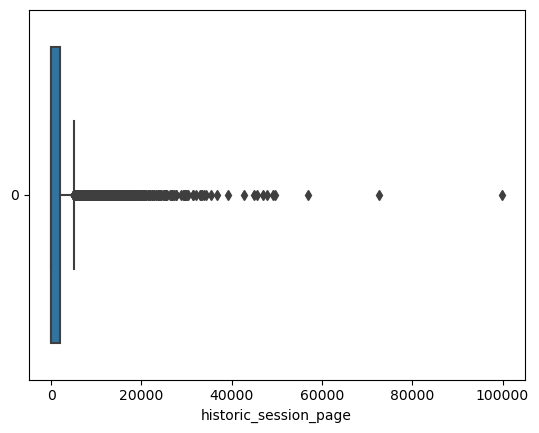

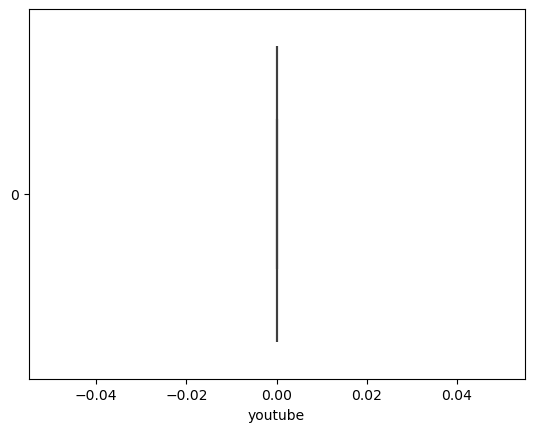

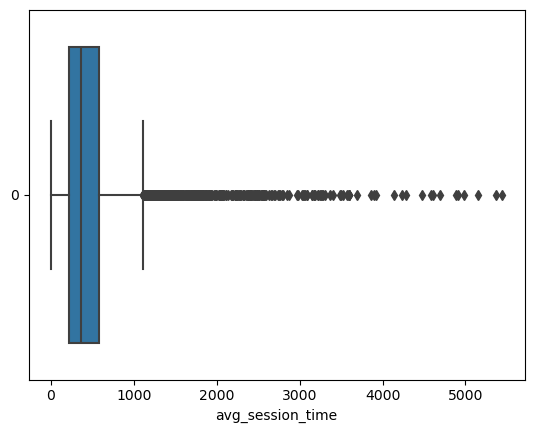

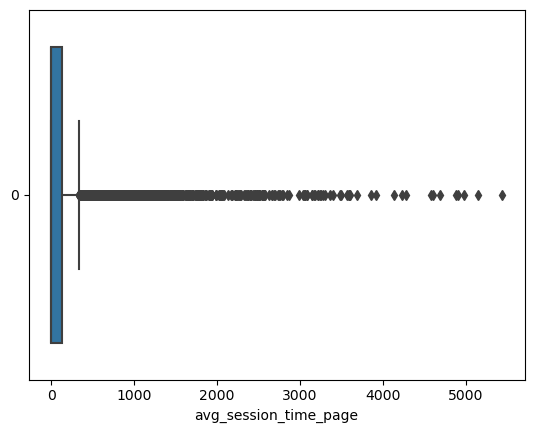

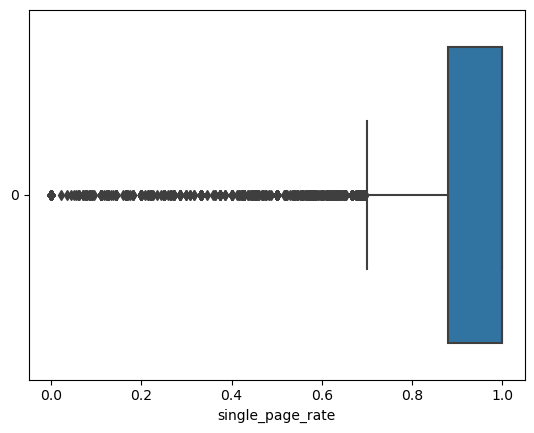

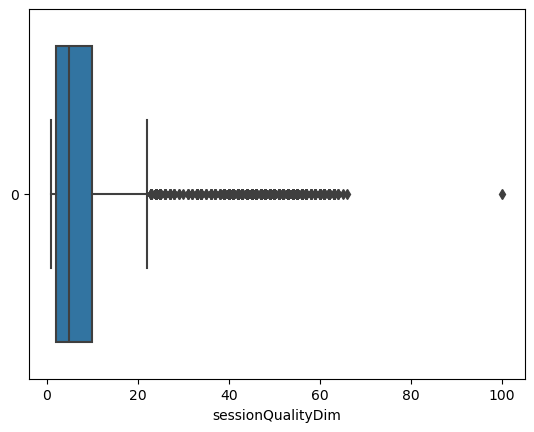

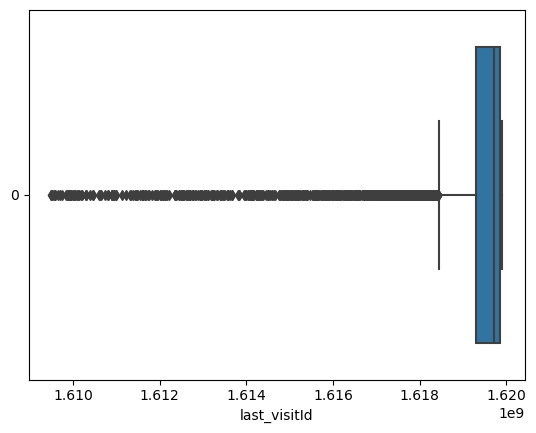

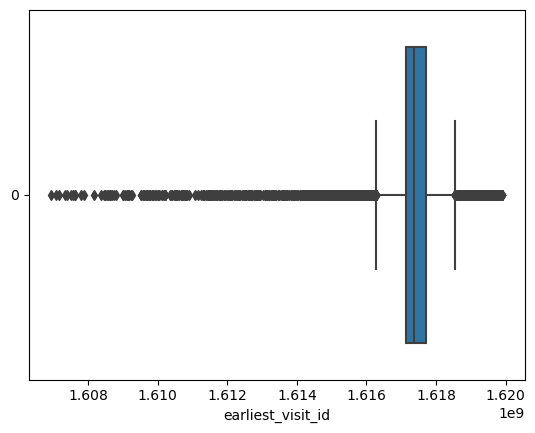

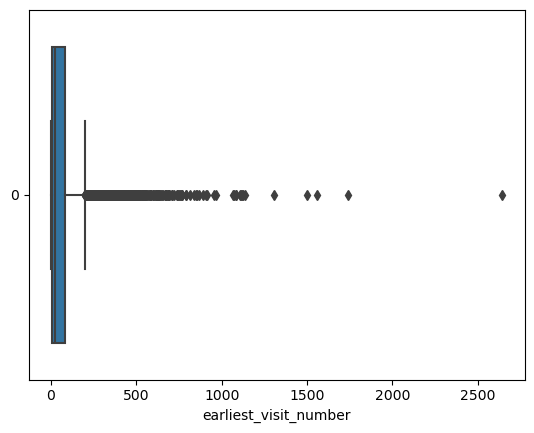

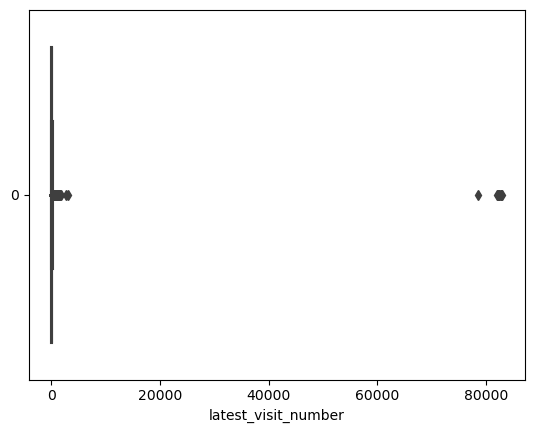

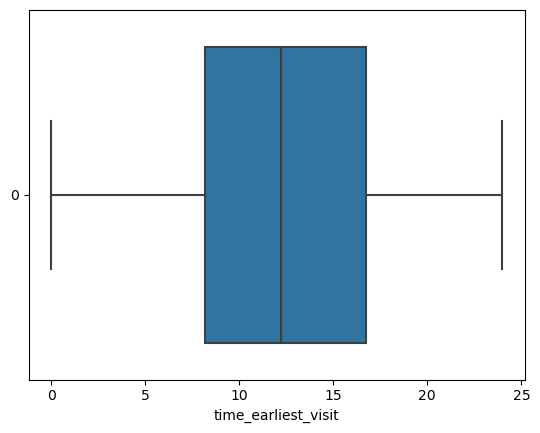

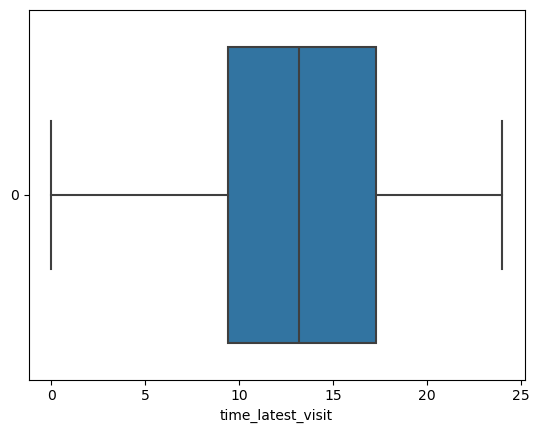

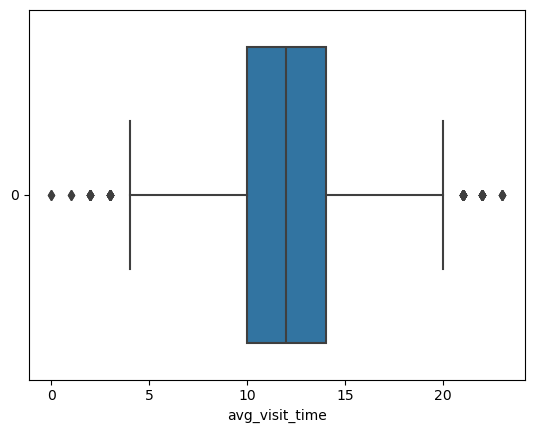

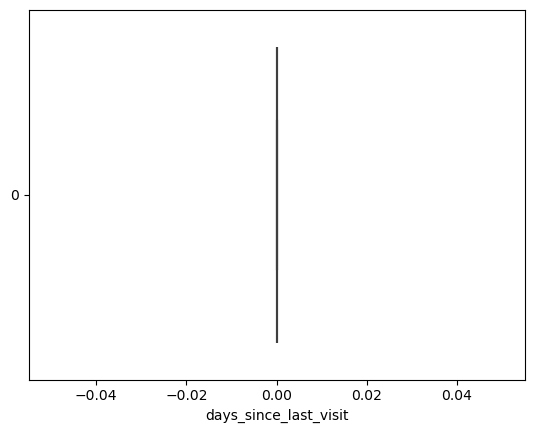

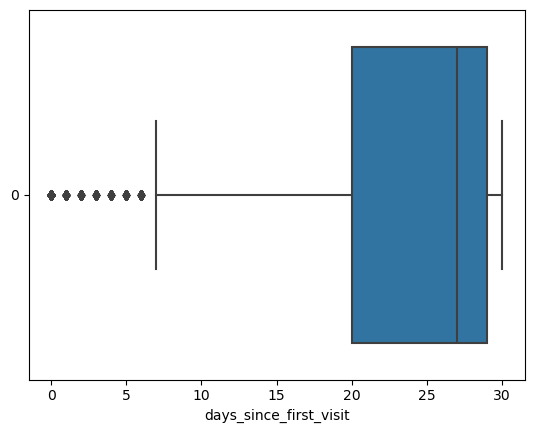

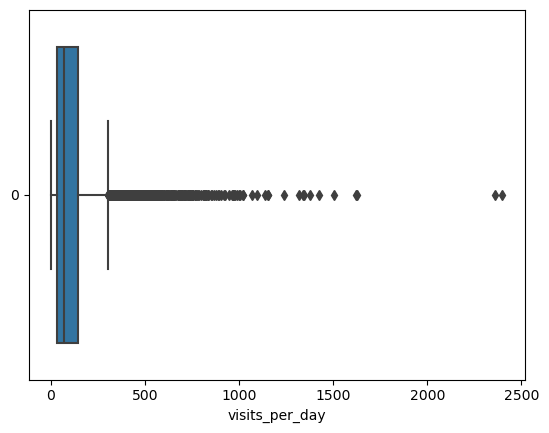

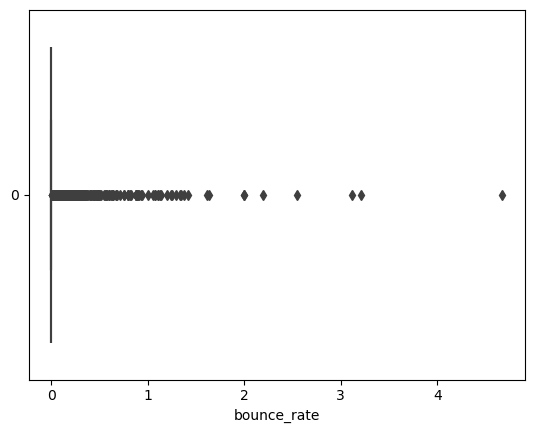

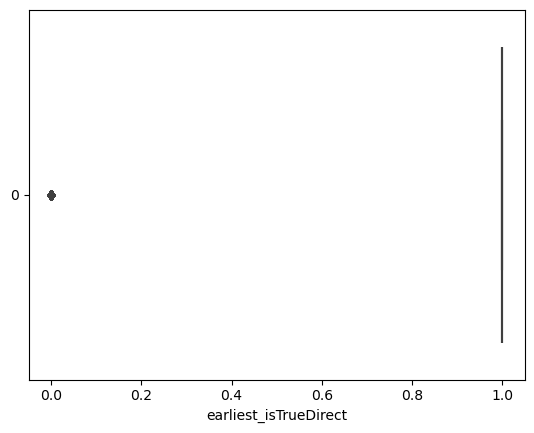

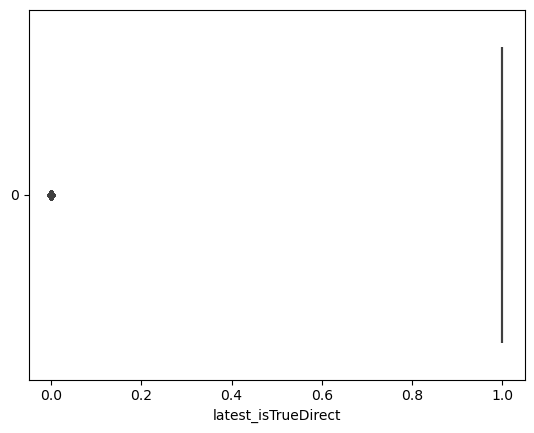

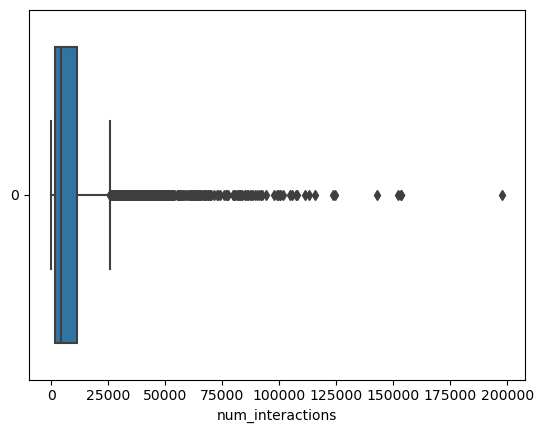

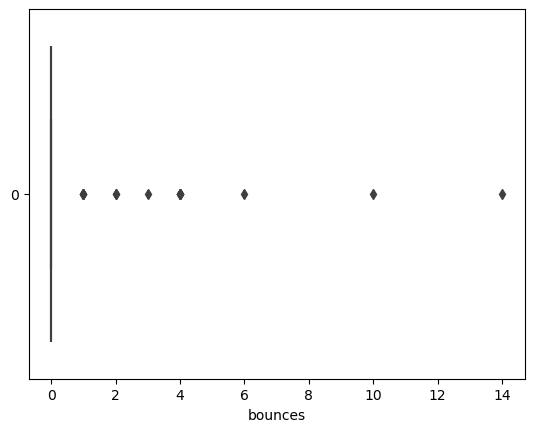

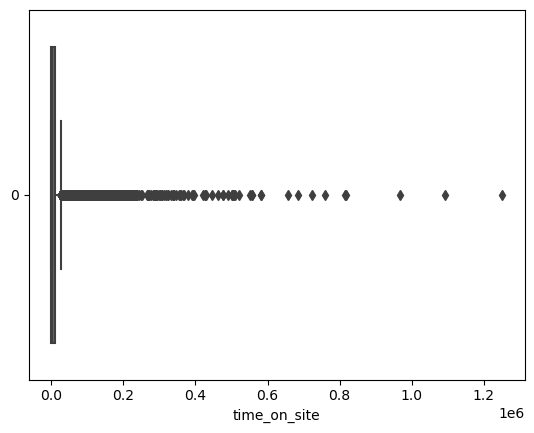

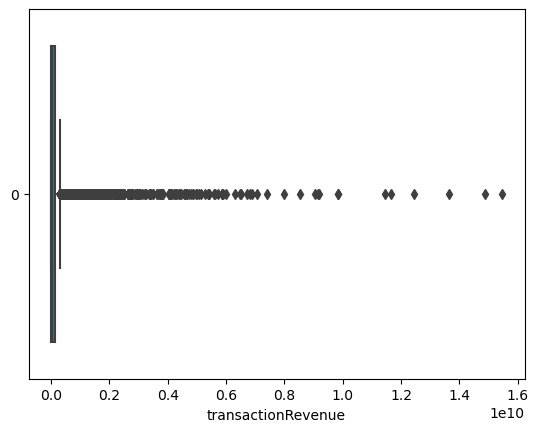

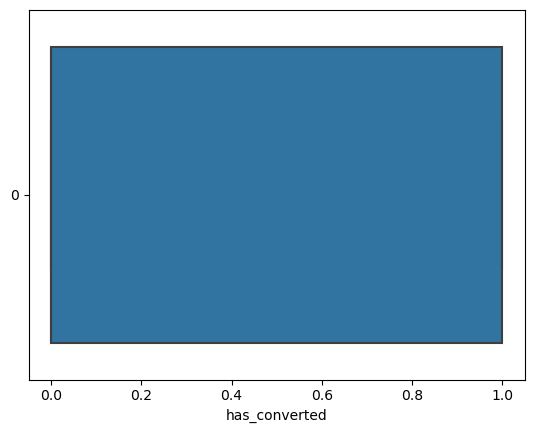

In [31]:
for i in range(len(load_data)):
    sns.boxplot(Load_data[load_data[i]],orient="h")
    plt.xlabel(load_data[i])
    plt.show()

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



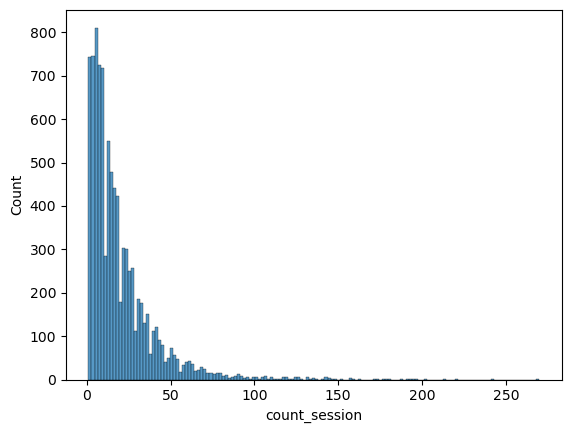

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



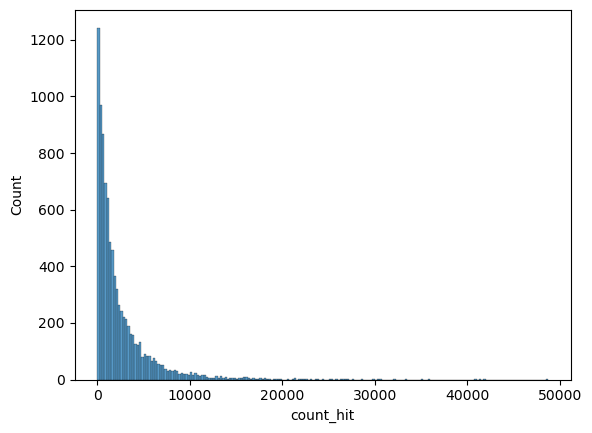

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



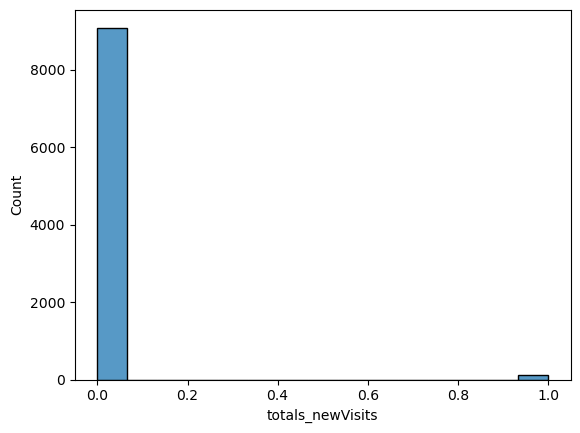

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



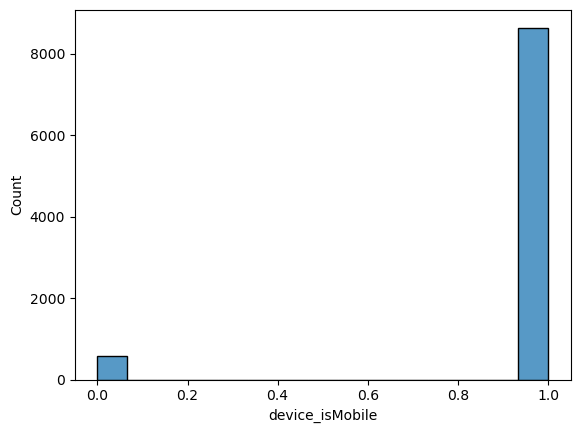

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



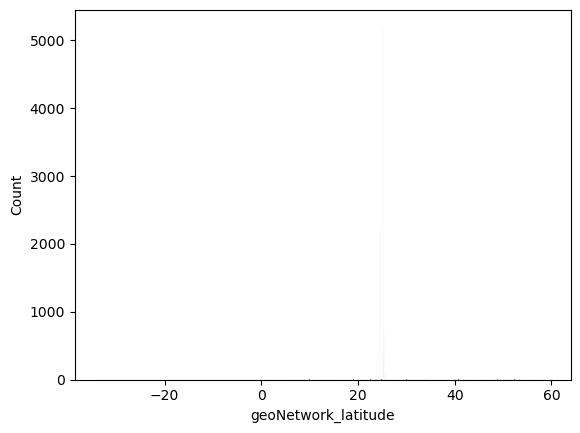

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



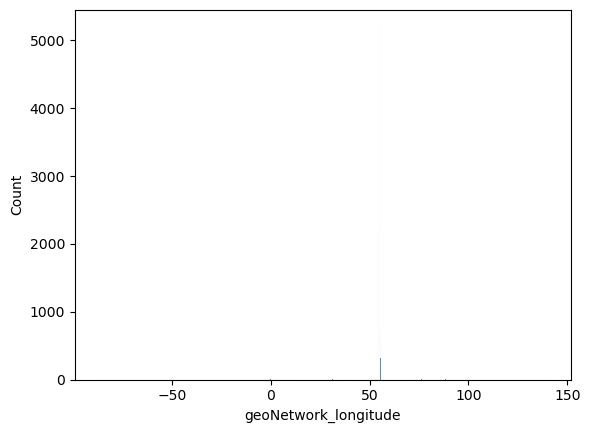

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



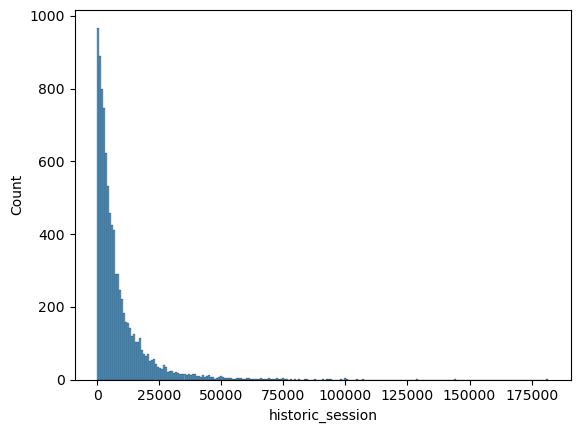

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



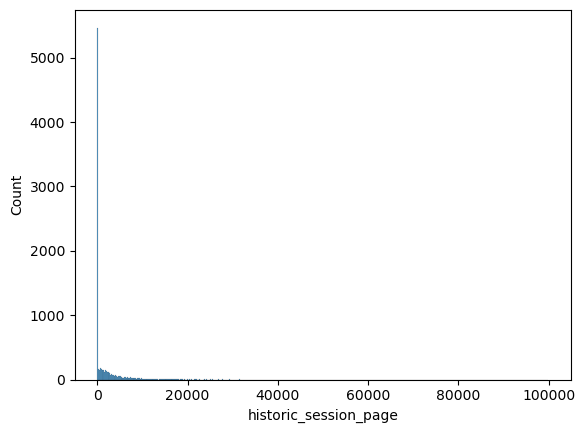

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



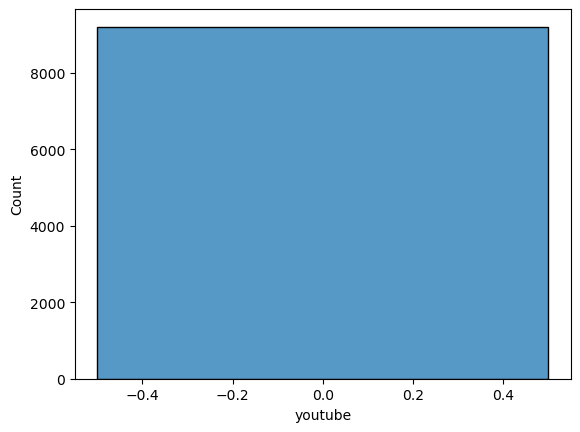

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



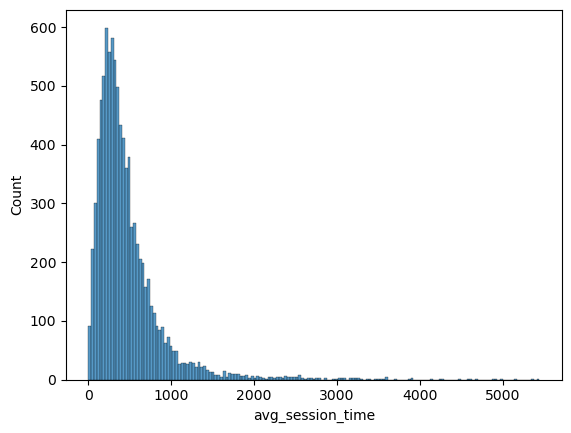

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



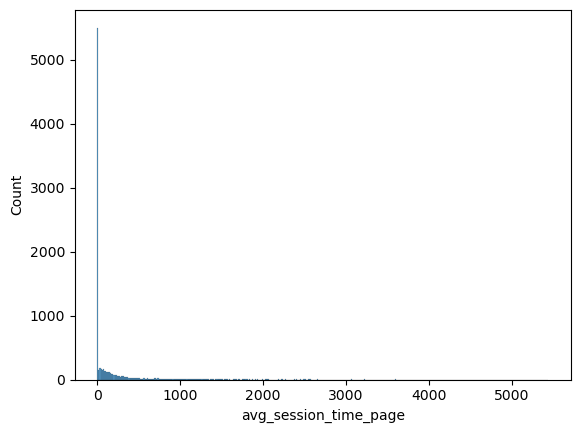

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



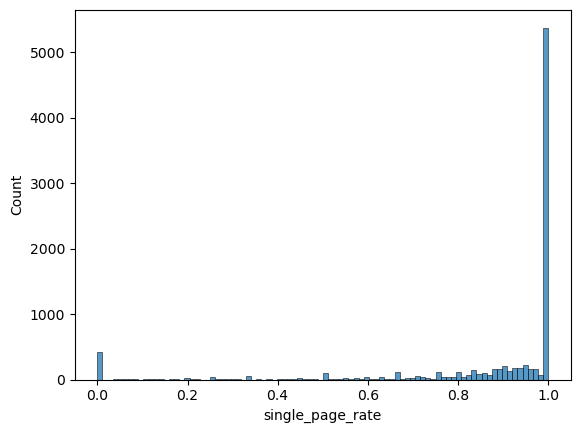

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



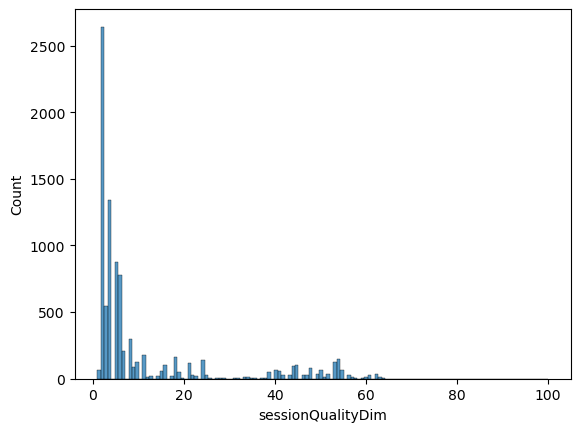

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



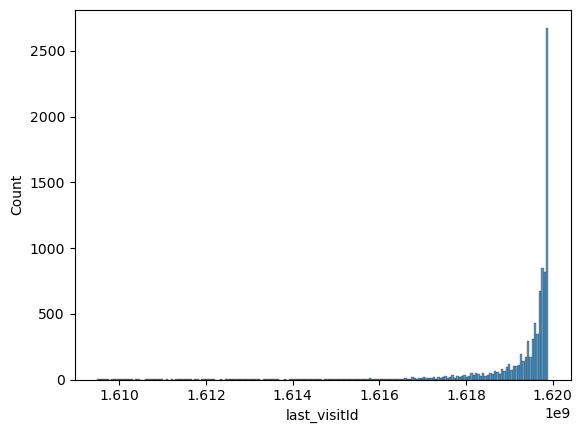

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



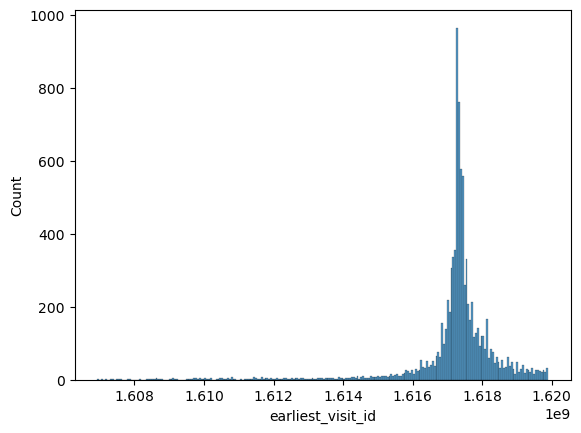

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



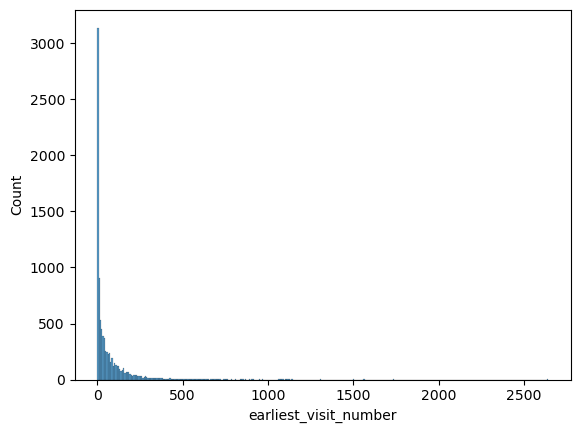

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



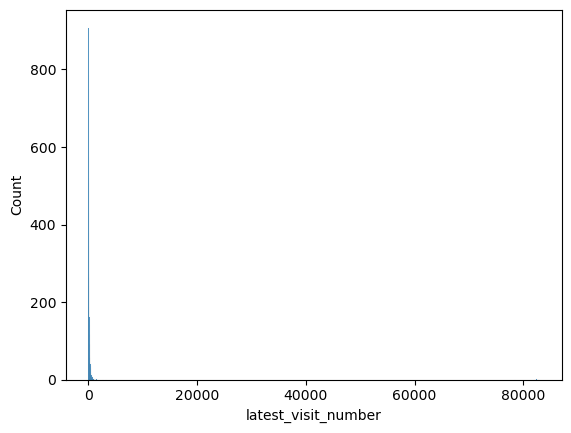

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



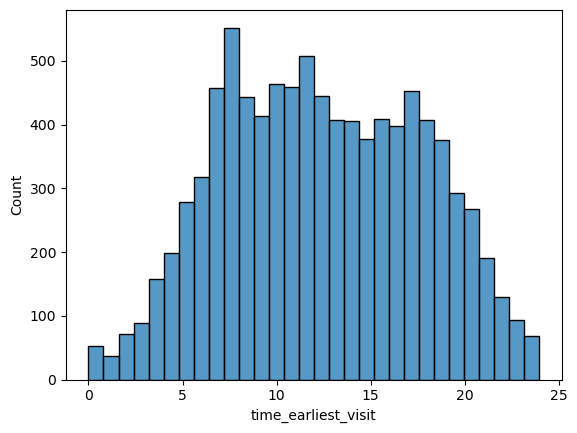

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



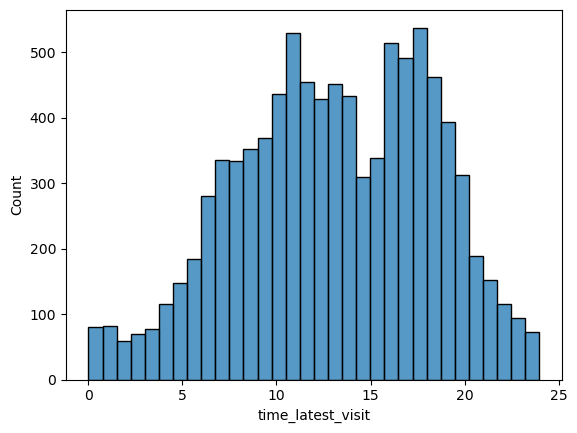

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



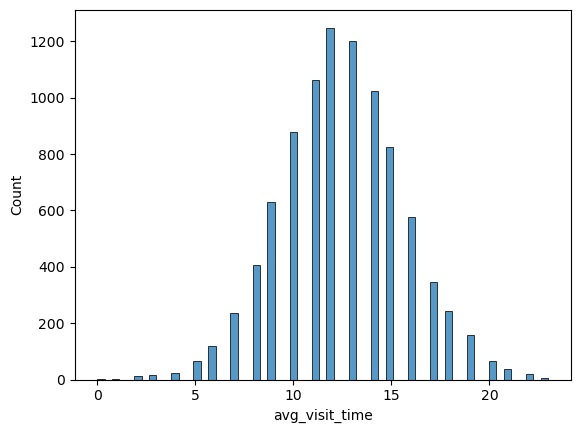

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



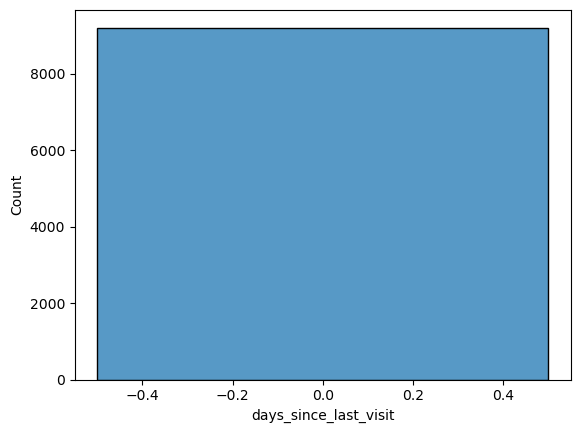

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



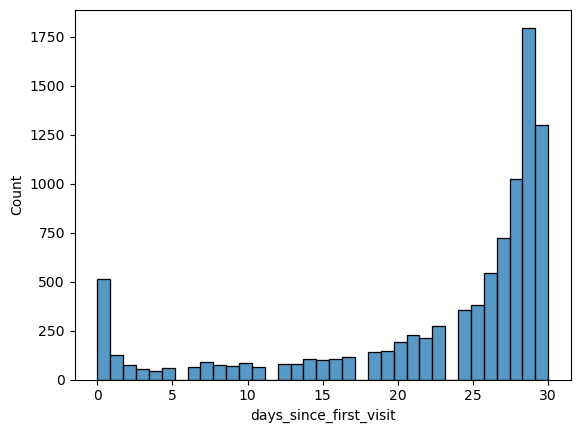

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



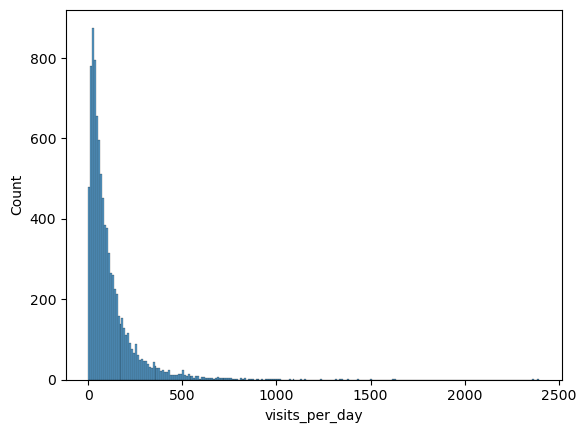

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



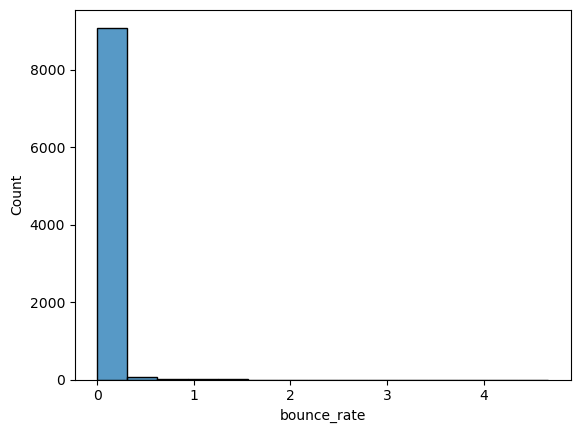

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



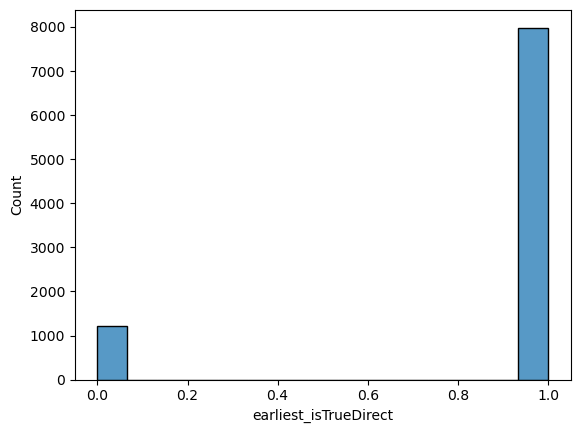

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



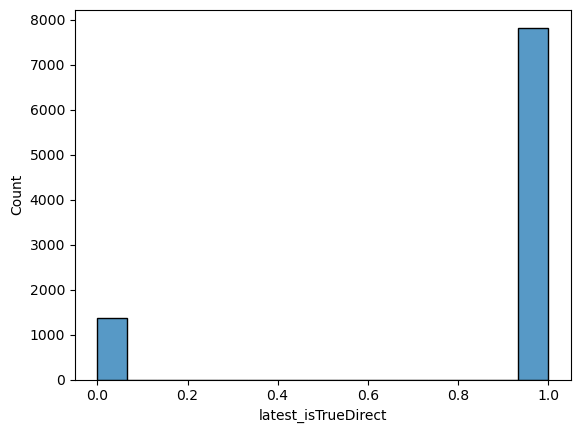

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



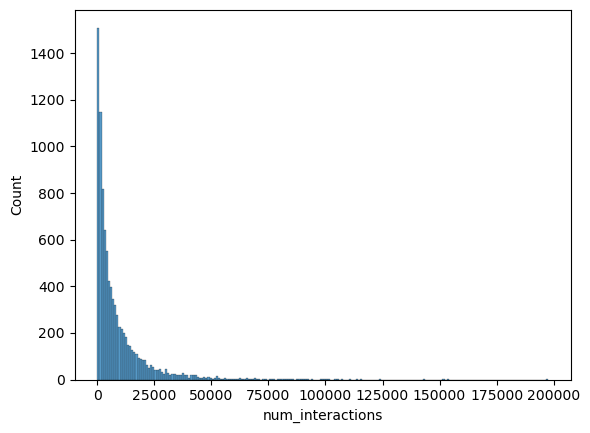

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



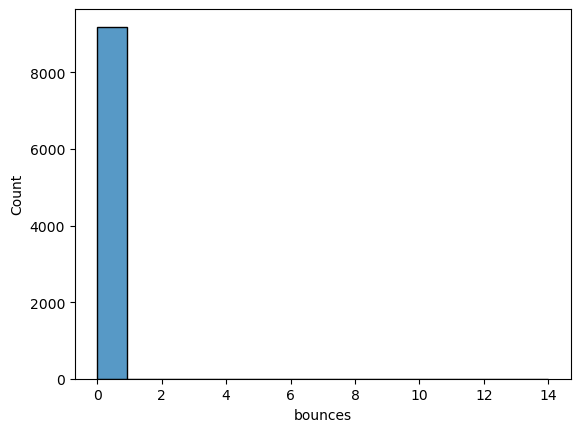

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



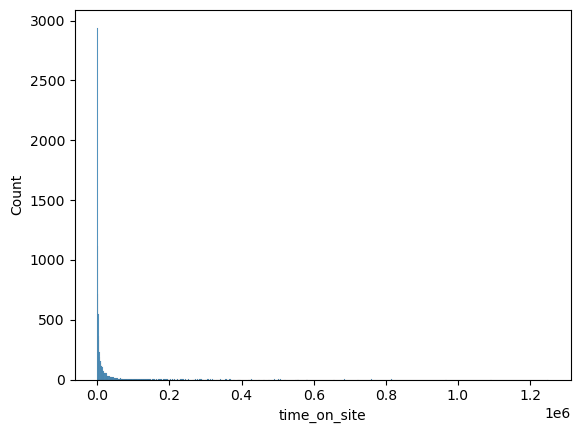

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



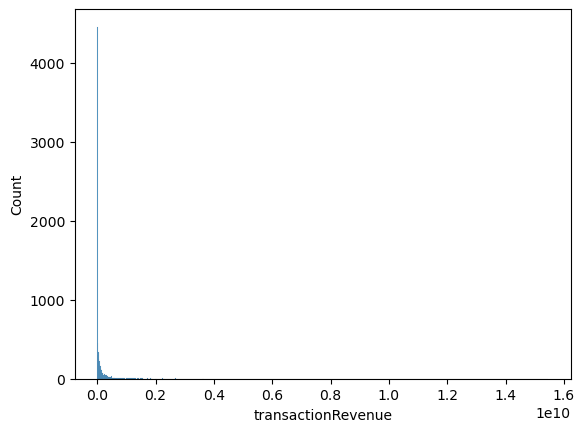

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



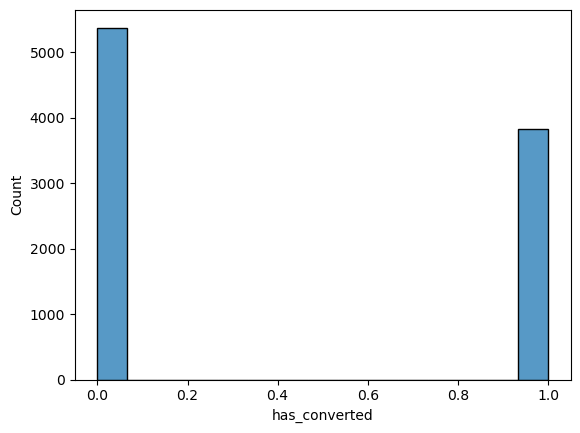

In [32]:
for i in range(len(load_data)):
    sns.histplot(Load_data[load_data[i]])
    plt.xlabel(load_data[i])
    plt.show()

In [33]:
load_data

['count_session',
 'count_hit',
 'totals_newVisits',
 'device_isMobile',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'historic_session',
 'historic_session_page',
 'youtube',
 'avg_session_time',
 'avg_session_time_page',
 'single_page_rate',
 'sessionQualityDim',
 'last_visitId',
 'earliest_visit_id',
 'earliest_visit_number',
 'latest_visit_number',
 'time_earliest_visit',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'transactionRevenue',
 'has_converted']

In [34]:
Load_data['has_converted'].value_counts()

has_converted
0    5374
1    3833
Name: count, dtype: int64

In [35]:
Load_data['latest_isTrueDirect'].value_counts()

latest_isTrueDirect
True     7830
False    1377
Name: count, dtype: int64

In [36]:
Load_data['earliest_isTrueDirect'].value_counts()

earliest_isTrueDirect
True     7986
False    1221
Name: count, dtype: int64

In [37]:
Load_data['days_since_last_visit'].value_counts()

days_since_last_visit
0    9207
Name: count, dtype: int64

In [38]:
Load_data['days_since_first_visit'].value_counts()

days_since_first_visit
29    1798
30    1298
28    1026
27     723
26     543
0      512
25     379
24     354
23     274
21     229
22     213
20     191
19     146
18     140
1      126
17     117
14     104
16     104
15      99
7       89
10      86
12      78
13      78
2       74
8       72
9       71
11      63
6       63
5       57
3       54
4       46
Name: count, dtype: int64

In [39]:
Load_data['geoNetwork_latitude'].value_counts()

geoNetwork_latitude
 25.2048    5187
 24.4539    2218
 25.3463     696
 24.1302     435
 25.4052     316
            ... 
 17.3850       1
-33.9249       1
 19.6967       1
 14.7566       1
 47.9030       1
Name: count, Length: 104, dtype: int64

In [40]:
Load_data.drop(["youtube","days_since_last_visit"],axis =1,inplace=True)

In [41]:
Load_data.shape

(9207, 41)

In [42]:
Load_data["latest_isTrueDirect"] =Load_data["latest_isTrueDirect"].astype("object")
Load_data["earliest_isTrueDirect"] =Load_data["earliest_isTrueDirect"].astype("object")
Load_data["device_isMobile"] =Load_data["device_isMobile"].astype("object")
Load_data["totals_newVisits"] =Load_data["totals_newVisits"].astype("object")

In [43]:
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   object 
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   object 
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null   floa

In [44]:
outliers=["transactionRevenue","time_on_site","bounces","num_interactions","bounce_rate","visits_per_day","days_since_first_visit","avg_visit_time","latest_visit_number","earliest_visit_number","sessionQualityDim","last_visitId","earliest_visit_id","single_page_rate","avg_session_time_page","avg_session_time","historic_session_page","historic_session","geoNetwork_longitude","geoNetwork_latitude","count_hit","count_session"]

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
for column in outliers:
    lr,ur=remove_outlier(Load_data[column])
    Load_data[column]=np.where(Load_data[column]>ur,ur,Load_data[column])
    Load_data[column]=np.where(Load_data[column]<lr,lr,Load_data[column])

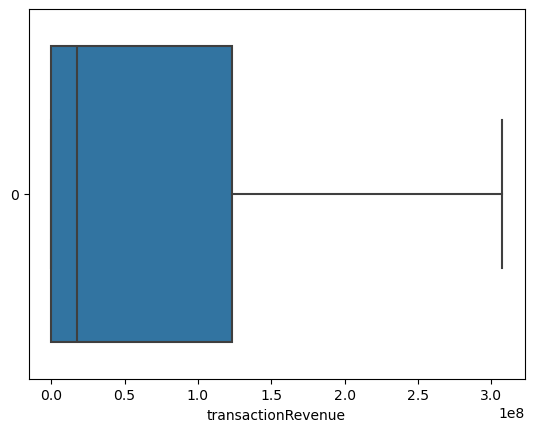

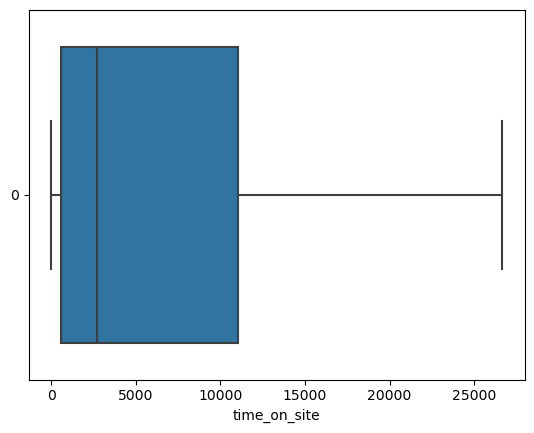

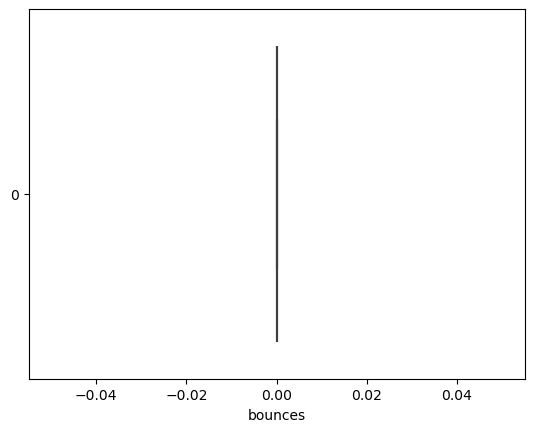

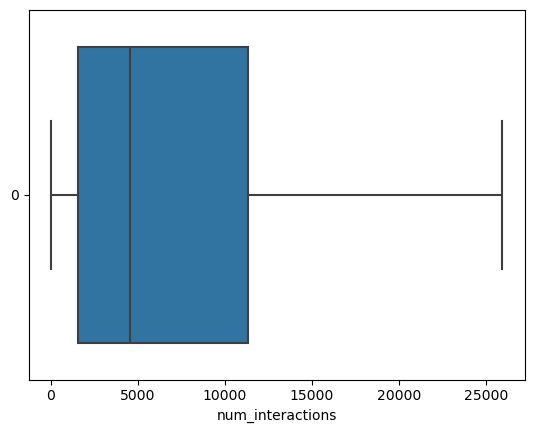

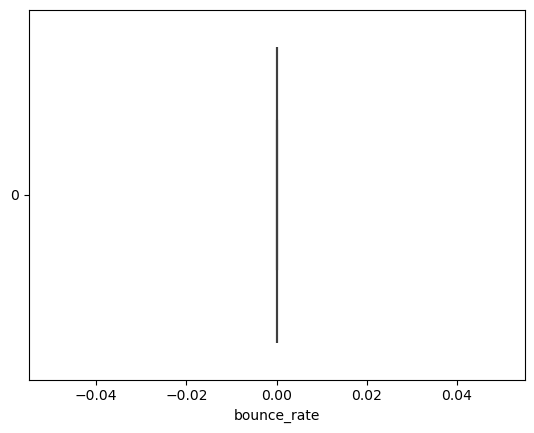

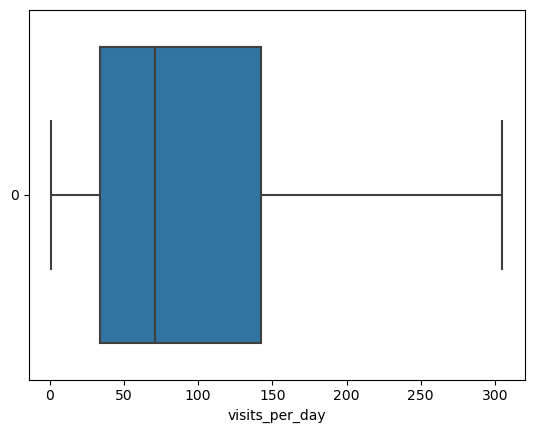

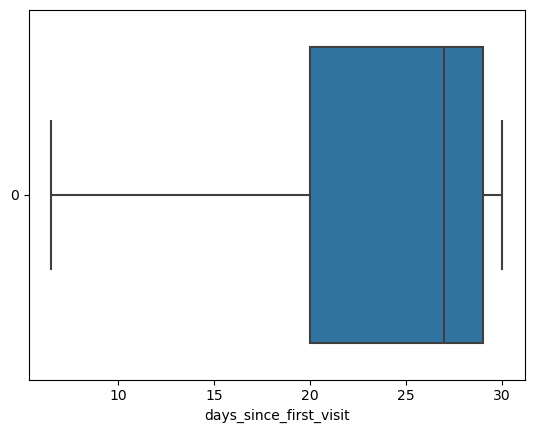

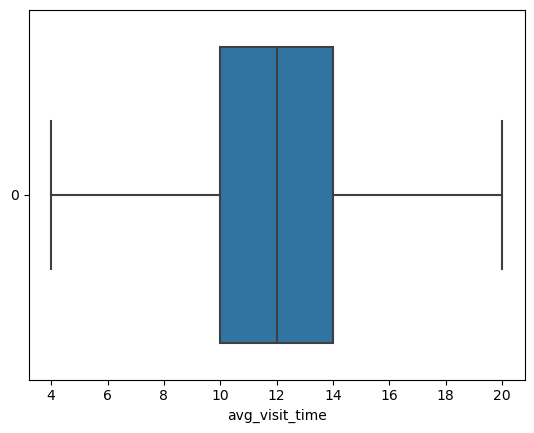

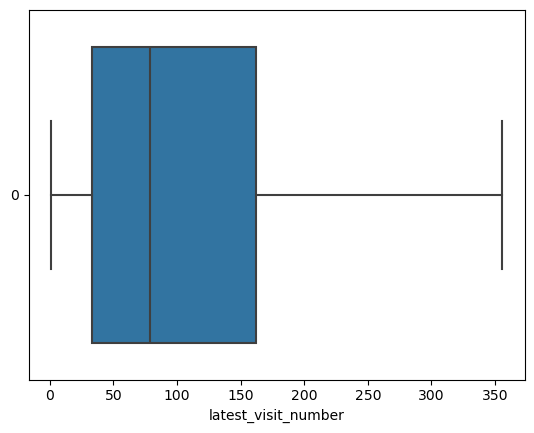

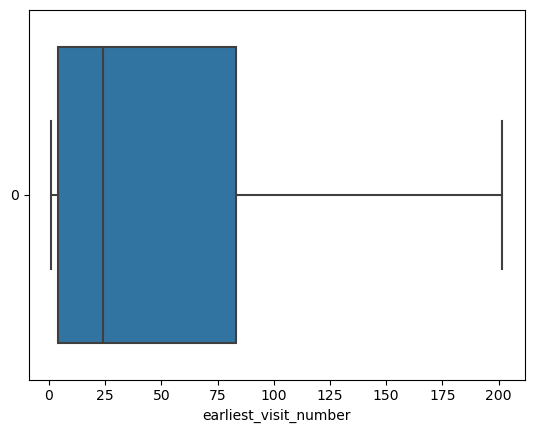

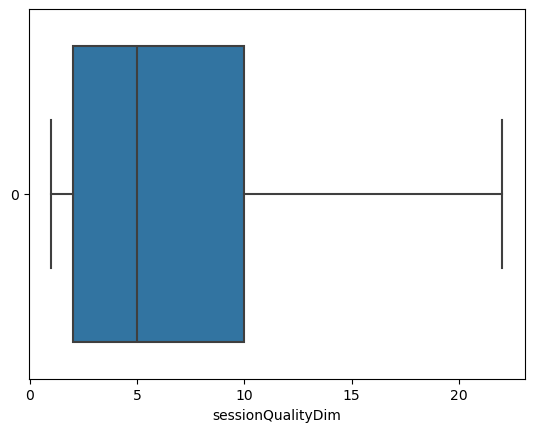

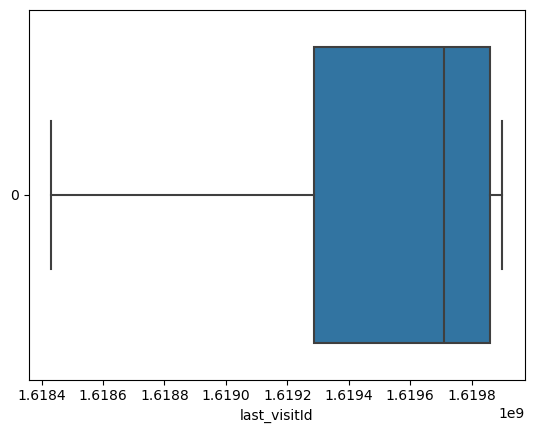

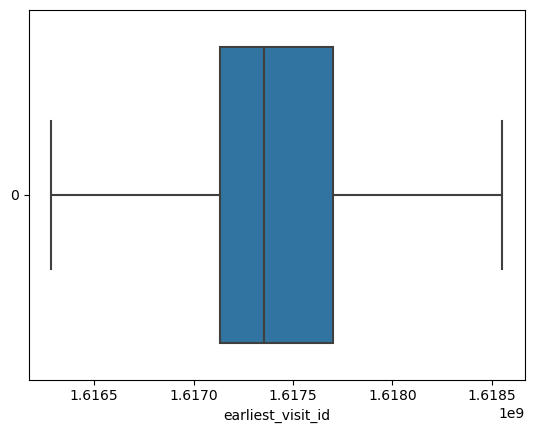

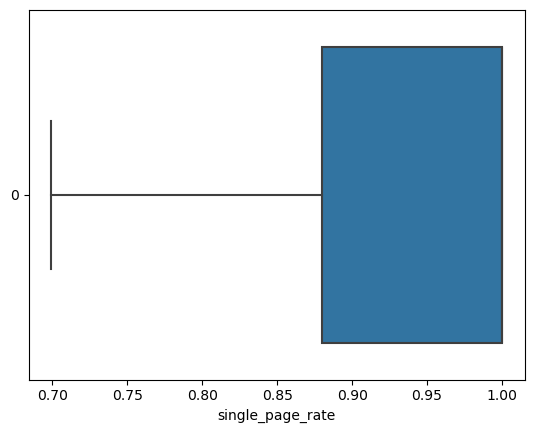

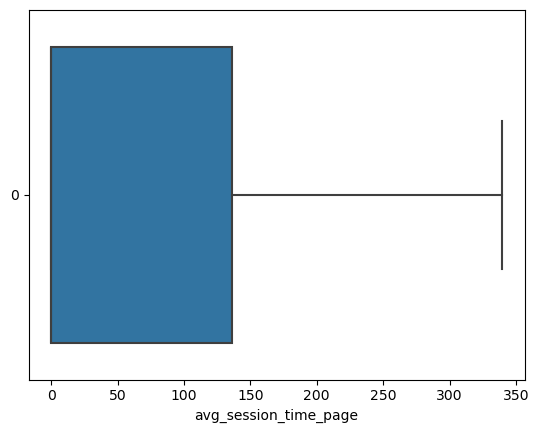

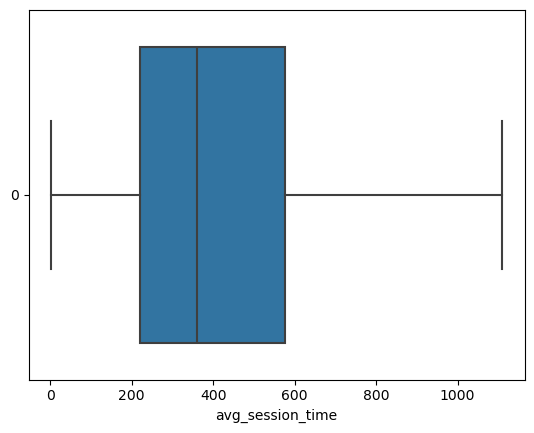

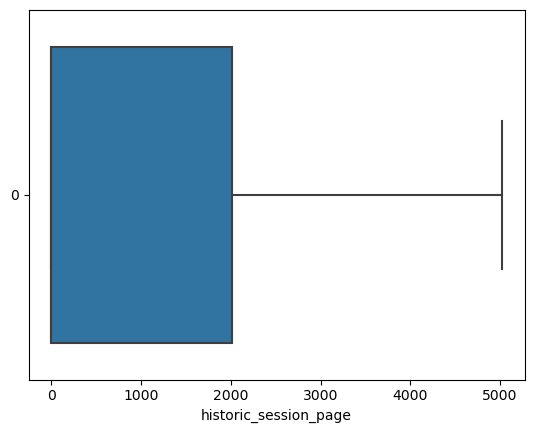

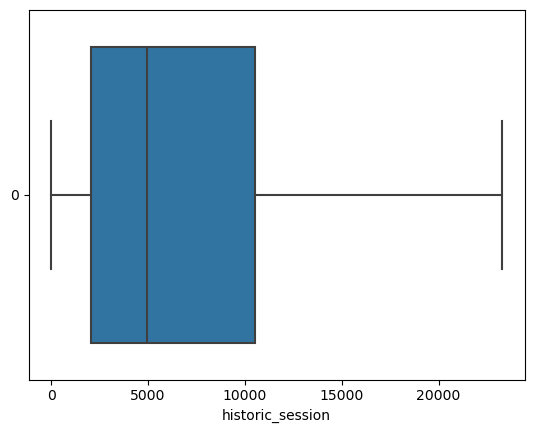

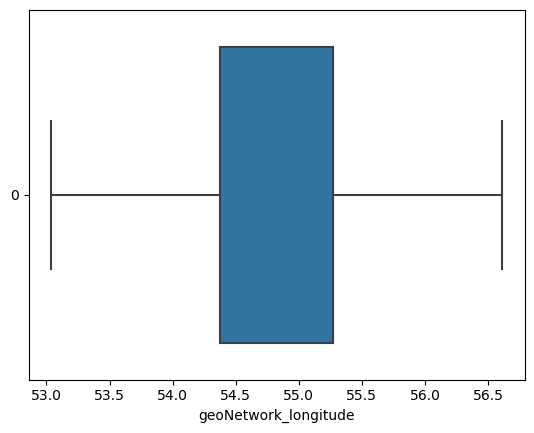

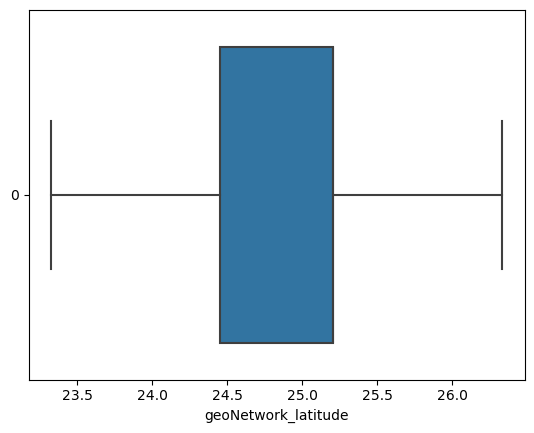

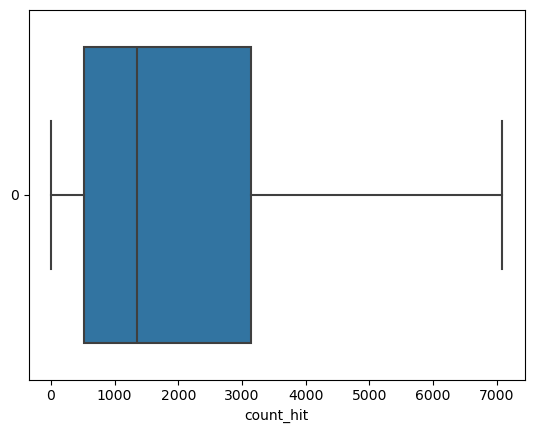

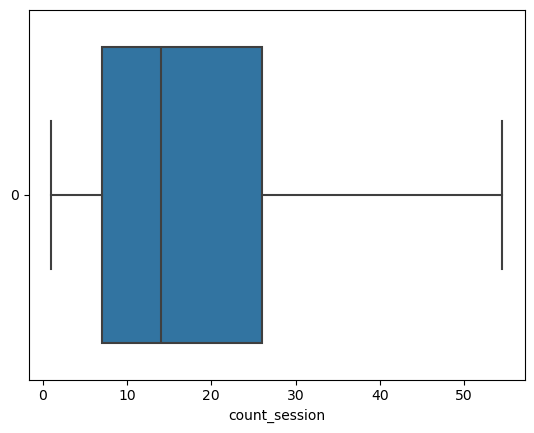

In [47]:
for i in outliers:
    sns.boxplot(Load_data[i],orient="h")
    plt.xlabel(i)
    plt.show()

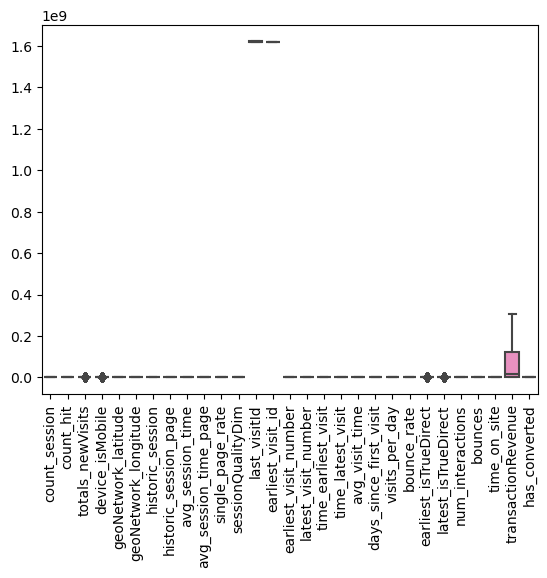

In [48]:
sns.boxplot(data=Load_data)
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

C:\Users\vjrni\AppData\Local\Temp\ipykernel_18900\2611010858.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='count_session', ylabel='Density'>

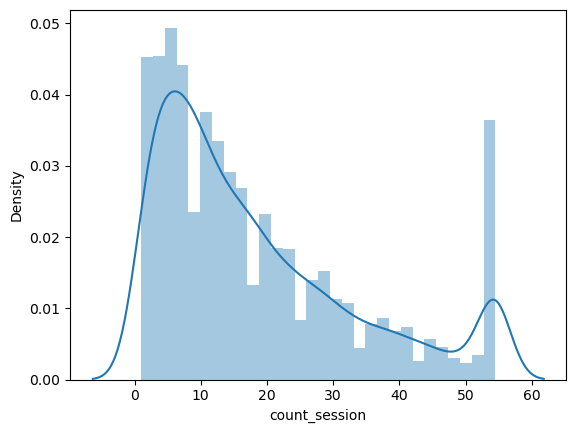

In [49]:
sns.distplot(Load_data["count_session"])

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='geoNetwork_longitude', ylabel='Count'>

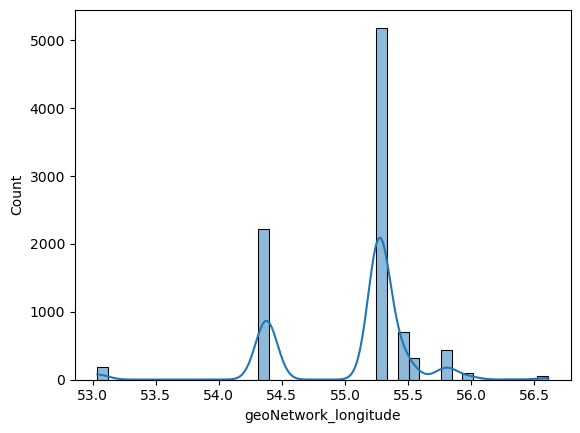

In [50]:
sns.histplot(Load_data["geoNetwork_longitude"],kde=True)

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Count'>

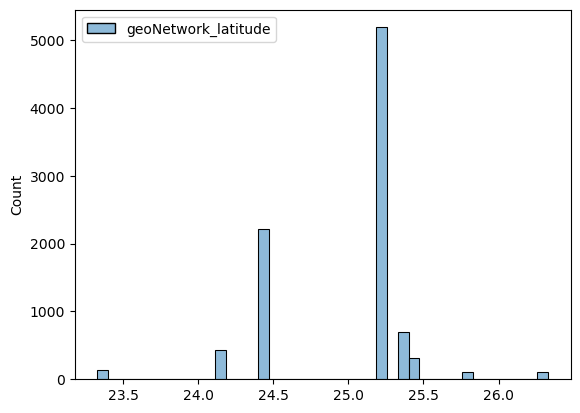

In [51]:
sns.histplot(Load_data[["geoNetwork_latitude"]])

C:\Users\vjrni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



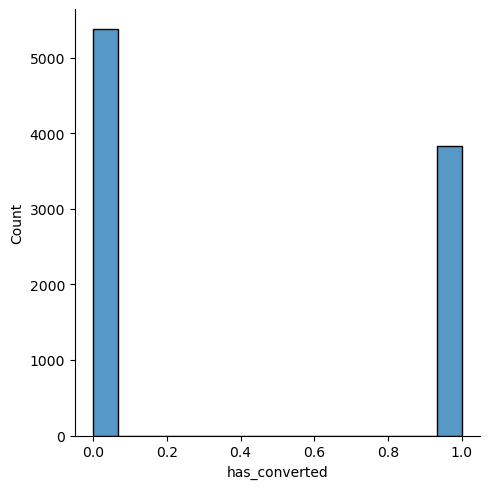

In [52]:
sns.displot(Load_data['has_converted'])

<Axes: xlabel='geoNetwork_longitude', ylabel='geoNetwork_latitude'>

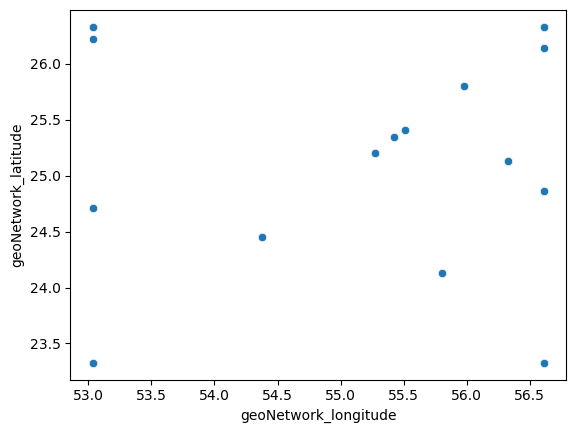

In [53]:
sns.scatterplot(x=Load_data["geoNetwork_longitude"],y=Load_data["geoNetwork_latitude"])

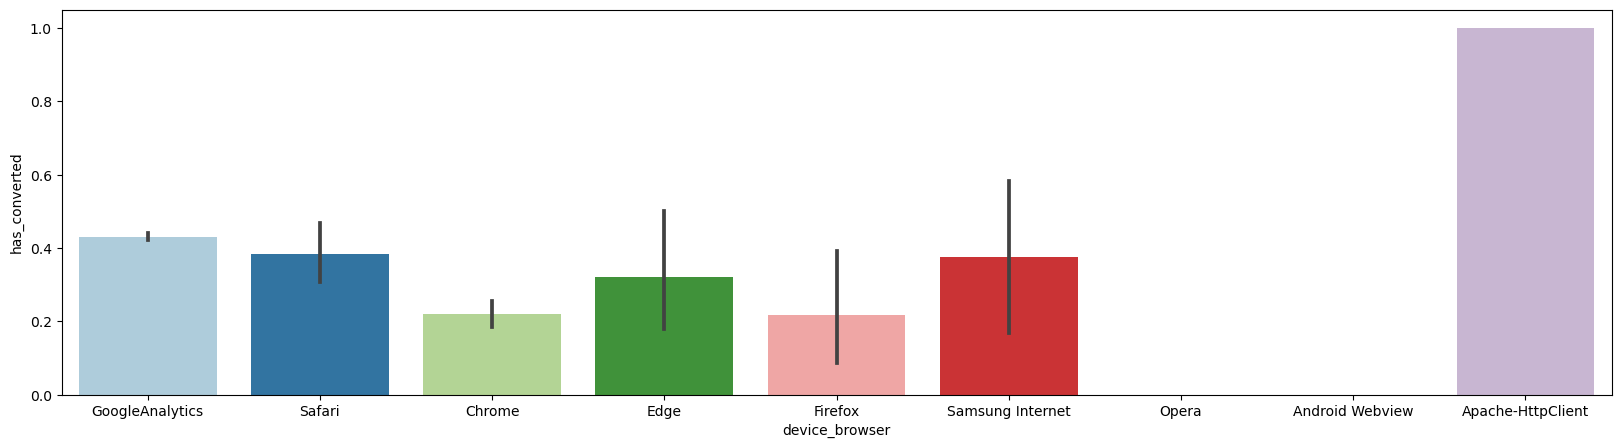

In [54]:
plt.figure(figsize=(20, 5))
# Create a bar plot with different colors for each bar
sns.barplot(data=Load_data, x='device_browser', y='has_converted', palette='Paired') 
# Show the plot
plt.show()

In [55]:
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   float64
 1   count_hit               9207 non-null   float64
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   object 
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   object 
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   float64
 12  historic_session_page   9207 non-null   float64
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null   floa

In [56]:
for i in Load_data.columns:
    if Load_data[i].dtype == "object":
        Load_data[i]= pd.Categorical(Load_data[i]).codes

In [57]:
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   float64
 1   count_hit               9207 non-null   float64
 2   channelGrouping         9207 non-null   int8   
 3   totals_newVisits        9207 non-null   int8   
 4   device_browser          9207 non-null   int8   
 5   device_operatingSystem  9207 non-null   int8   
 6   device_isMobile         9207 non-null   int8   
 7   device_deviceCategory   9207 non-null   int8   
 8   geoNetwork_region       9207 non-null   int8   
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   float64
 12  historic_session_page   9207 non-null   float64
 13  avg_session_time        9207 non-null   float64
 14  avg_session_time_page   9207 non-null   floa

In [58]:
Load_data.head(6)

count_session  count_hit  channelGrouping  totals_newVisits  \
0             9.0     1194.0                0                 0   
2            28.0     1816.0                2                 0   
3             2.0      299.0                2                 0   
16            3.0      507.0                2                 0   
20            9.0     1037.0                2                 0   
22            5.0      338.0                2                 0   

    device_browser  device_operatingSystem  device_isMobile  \
0                5                       1                1   
2                5                       1                1   
3                5                       1                1   
16               5                       6                1   
20               5                       1                1   
22               7                       4                0   

    device_deviceCategory  geoNetwork_region  geoNetwork_latitude  ...  \
0                       1                 71              25.3463  ...   
2                       1                  2              25.4052  ...   
3                       1                  1              24.4539  ...   
16                      1                  1              24.4539  ...   
20                      1                 25              25.2048  ...   
22                      0                 25              25.2048  ...   

    earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                  3               2                      1   
2                  3               1                      1   
3                 89              96                      1   
16                88              95                      1   
20                 3               2                      1   
22                89              91                      1   

    latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                     1            1900.0      0.0       5617.00   
2                     1            3843.0      0.0      26652.75   
3                     1             592.0      0.0       1576.00   
16                    1             507.0      0.0       1958.00   
20                    1            1674.0      0.0      26652.75   
22                    0            4213.0      0.0        463.00   

    transactionRevenue  products_array  has_converted  
0                  0.0            2265              0  
2          307221222.5             898              1  
3                  0.0            2234              0  
16          28745286.0             414              1  
20         307221222.5            2506              1  
22          63207046.0            1449              1  

[6 rows x 41 columns]

# In this part Build Algorithm

# 1. Decision Tree Model

In [59]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtc = DecisionTreeClassifier(criterion='gini')

In [61]:
# feature and traget variable
X = Load_data.drop("has_converted",axis=1)
y = Load_data[["has_converted"]]

In [62]:
X

count_session  count_hit  channelGrouping  totals_newVisits  \
0                9.0     1194.0                0                 0   
2               28.0     1816.0                2                 0   
3                2.0      299.0                2                 0   
16               3.0      507.0                2                 0   
20               9.0     1037.0                2                 0   
...              ...        ...              ...               ...   
99888            1.0      195.0                2                 0   
99907           28.0     3071.0                2                 0   
99908            7.0     1018.0                2                 0   
99921            6.0      818.0                2                 0   
99934           54.5     7085.0                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       device_deviceCategory  geoNetwork_region  geoNetwork_latitude  ...  \
0                          1                 71              25.3463  ...   
2                          1                  2              25.4052  ...   
3                          1                  1              24.4539  ...   
16                         1                  1              24.4539  ...   
20                         1                 25              25.2048  ...   
...                      ...                ...                  ...  ...   
99888                      1                  1              24.4539  ...   
99907                      1                  1              24.4539  ...   
99908                      1                 25              25.2048  ...   
99921                      1                 25              25.2048  ...   
99934                      1                 25              25.2048  ...   

       latest_medium  earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                  0                 3               2                      1   
2                  1                 3               1                      1   
3                  1                89              96                      1   
16                 1                88              95                      1   
20                 1                 3               2                      1   
...              ...               ...             ...                    ...   
99888              1                61              68                      1   
99907              1                90              95                      1   
99908              1                88              95                      1   
99921              1                 3              31                      1   
99934              1                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1            1900.0      0.0       5617.00   
2                        1            3843.0      0.0      26652.75   
3                        1             592.0      0.0       1576.00   
16                       1             507.0      0.0       1958.00   
20                       1            1674.0      0.0      26652.75   
...                    ...               ...     

In [63]:
y

has_converted
0                  0
2                  1
3                  0
16                 1
20                 1
...              ...
99888              0
99907              0
99908              1
99921              0
99934              1

[9207 rows x 1 columns]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=30)

In [65]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
print(X_train.shape)
print(X_test.shape)

(6444, 40)
(2763, 40)


In [67]:
y_train_pred = dtc.predict(X_train)

In [68]:
y_train_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [69]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3748
           1       1.00      1.00      1.00      2696

    accuracy                           1.00      6444
   macro avg       1.00      1.00      1.00      6444
weighted avg       1.00      1.00      1.00      6444



In [70]:
dtc.score(X_train,y_train)

1.0

In [71]:
dtc.score(X_test,y_test)

0.9511400651465798

# AUC and ROC for the training and test data Decision tree

AUC: 1.000


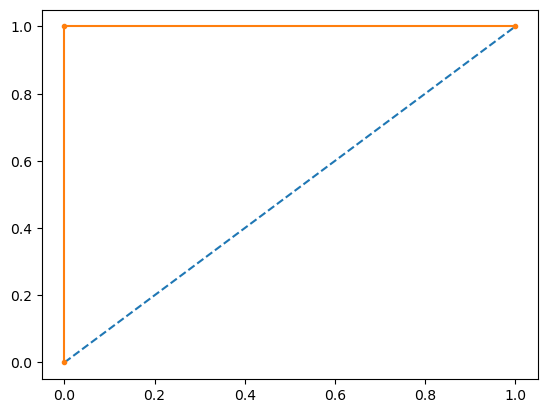

In [72]:
probs = dtc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.951


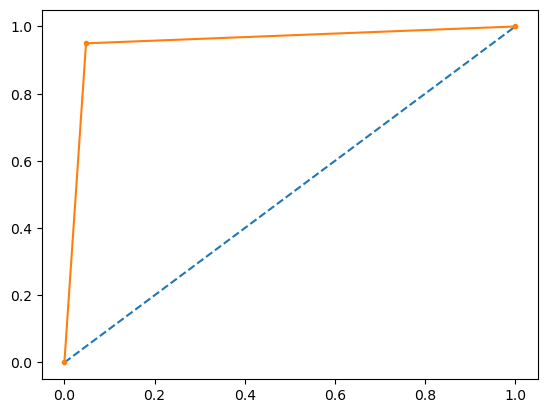

In [73]:
probs = dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 2. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [76]:
train_pred = log_model.predict(X_train)

In [77]:
print(metrics.classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83      3748
           1       0.83      0.59      0.69      2696

    accuracy                           0.78      6444
   macro avg       0.79      0.75      0.76      6444
weighted avg       0.79      0.78      0.77      6444



In [78]:
print(metrics.confusion_matrix(y_train,train_pred))

[[3429  319]
 [1116 1580]]


In [79]:
test_pred = log_model.predict(X_test)

In [80]:
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1626
           1       0.79      0.58      0.67      1137

    accuracy                           0.77      2763
   macro avg       0.77      0.74      0.74      2763
weighted avg       0.77      0.77      0.76      2763



In [81]:
print(metrics.confusion_matrix(y_test,test_pred))

[[1450  176]
 [ 473  664]]


In [82]:
log_model.score(X_test,y_test)

0.7651103872602244

In [83]:
log_model.score(X_train,y_train)

0.7773122284295468

AUC: 0.925


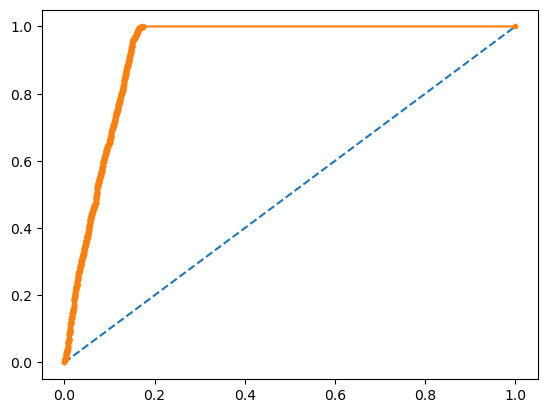

In [84]:
# AUC and ROC for the training data

# predict probabilities
probs = log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.910


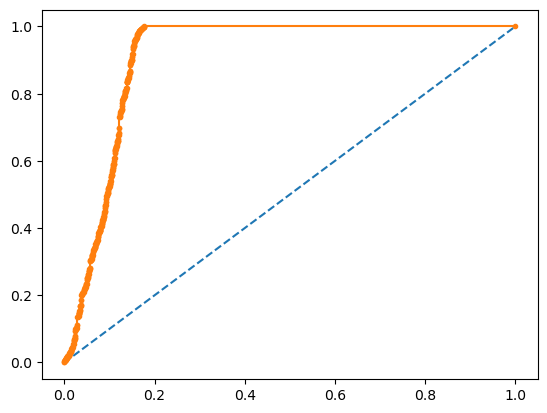

In [85]:
# AUC and ROC for the training data

# predict probabilities
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 3. Random Forest Model

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
Rand_model = RandomForestClassifier(n_estimators=500,oob_score=True)
Rand_model.fit(X_train,y_train)

C:\Users\vjrni\AppData\Local\Temp\ipykernel_18900\2818210918.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=500, oob_score=True)

In [88]:
oob_score = Rand_model.oob_score_
print("OOB Score is: %.3f"% oob_score)
oob_error = 1-Rand_model.oob_score_
print("OOB Error is: %.3f"% oob_error)

OOB Score is: 0.961
OOB Error is: 0.039


In [89]:
y_train_pred_rad = Rand_model.predict(X_train)
y_test_pred_rad = Rand_model.predict(X_test)

In [90]:
print(metrics.classification_report(y_train,y_train_pred_rad))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3748
           1       1.00      1.00      1.00      2696

    accuracy                           1.00      6444
   macro avg       1.00      1.00      1.00      6444
weighted avg       1.00      1.00      1.00      6444



In [91]:
print(metrics.classification_report(y_test,y_test_pred_rad))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1626
           1       0.94      0.96      0.95      1137

    accuracy                           0.96      2763
   macro avg       0.96      0.96      0.96      2763
weighted avg       0.96      0.96      0.96      2763



In [92]:
Accuracy = accuracy_score(y_test,y_test_pred_rad)
print(f"Accuracy : {Accuracy}")

Accuracy : 0.9591024249004705


In [93]:
print(metrics.confusion_matrix(y_train,y_train_pred_rad))

[[3748    0]
 [   0 2696]]


In [94]:
print(metrics.confusion_matrix(y_test,y_test_pred_rad))

[[1554   72]
 [  41 1096]]


AUC: 1.000


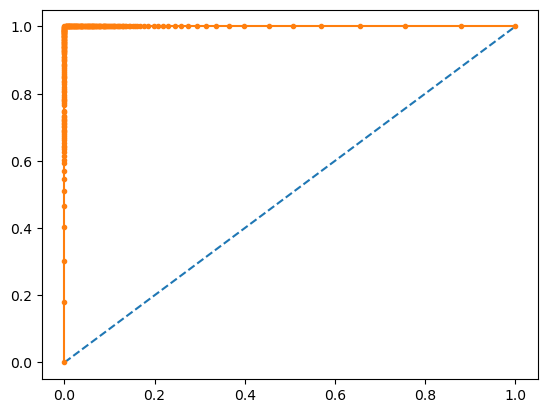

In [95]:
# AUC and ROC for the training data
# predict probabilities
probs = Rand_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.994


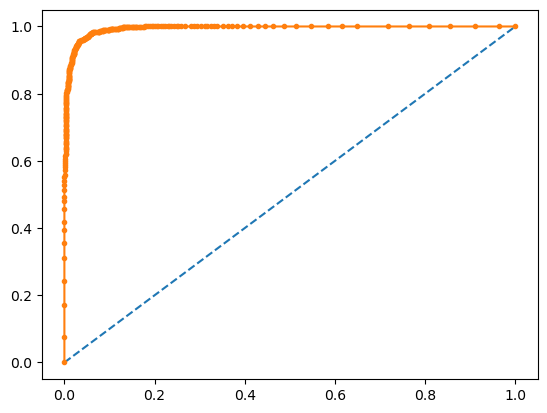

In [96]:
# AUC and ROC for the training data
# predict probabilities
probs = Rand_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [97]:
# Create an instance of each regression model
dtc = DecisionTreeClassifier(criterion='gini')
log_model = LogisticRegression()
Rand_model = RandomForestClassifier(n_estimators=500,oob_score=True)

# Train the models
dtc.fit(X_train,y_train)
log_model.fit(X_train,y_train)
Rand_model.fit(X_train,y_train)

# Make predictions on the test 
dtc_pred = dtc.predict(X_test)
log_pred = log_model.predict(X_test)
Rand_pre = Rand_model.predict(X_test)

# Evaluate the Models
dtc_acc = accuracy_score(y_test,dtc_pred)
log_acc = accuracy_score(y_test,log_pred)
Rand_acc = accuracy_score(y_test,Rand_pre)

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\vjrni\AppData\Local\Temp\ipykernel_18900\556156340.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



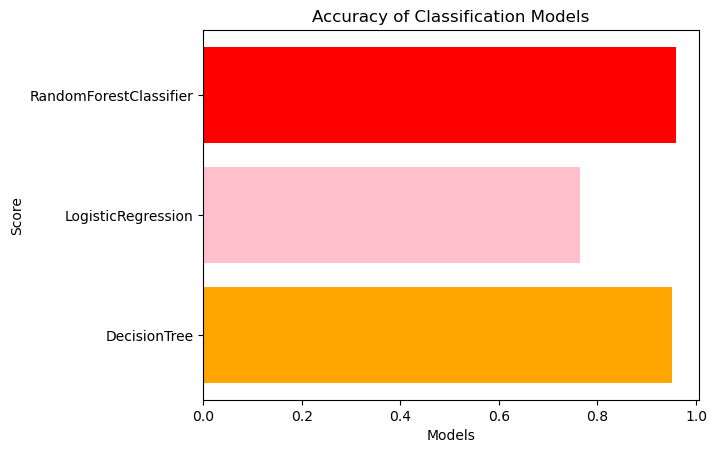

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

DecisionTree 0.9515019905899385
LogisticRegression 0.7651103872602244
RandomForestClassifier 0.9583785740137531


In [98]:
models = ['DecisionTree', 'LogisticRegression', 'RandomForestClassifier']
score = [dtc_acc, log_acc, Rand_acc]

colors = ['orange', 'pink', 'red']
plt.barh(models, score, color=colors)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
ax.set_facecolor('black')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

In [99]:
print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")


Model: RandomForestClassifier contain Maximum accuracy: 0.9583785740137531 


In [100]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
rfe = RFE(Rand_model,n_features_to_select=None)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\vjrni\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\vjrni\anaconda3\Lib\site-packages\s

[False  True False False False  True False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True False False False False False  True False False False  True
 False  True  True  True]
[ 3  1 17 18  8  1 13 11 12  9 10  1  1  1  1  1  1  1  1  1  1  1  1  5
  7  1 19  6 16  4 20  1  2 14 15  1 21  1  1  1]


Index(['count_hit', 'device_operatingSystem', 'historic_session',
       'historic_session_page', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'earliest_visit_id', 'earliest_visit_number', 'latest_visit_number',
       'time_earliest_visit', 'time_latest_visit', 'visits_per_day',
       'earliest_keyword', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array'],
      dtype='object')

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [102]:
best_feat = SelectKBest(score_func=chi2,k=10)
fit = best_feat.fit(X,y)

In [103]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [104]:
feat_score = pd.concat([dfcolumns,dfscores],axis=1)
feat_score.columns = ['Specs','Score']
print(feat_score.nlargest(10,'Score'))

                    Specs         Score
38     transactionRevenue  4.872024e+11
35       num_interactions  7.632337e+06
1               count_hit  1.273065e+06
12  historic_session_page  9.486131e+05
39         products_array  3.197366e+05
37           time_on_site  1.879969e+05
13       avg_session_time  8.366792e+04
14  avg_session_time_page  5.801899e+04
11       historic_session  4.939690e+04
25         visits_per_day  2.520142e+04


In [105]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler=StandardScaler()
ohe=OneHotEncoder()

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = Load_data['has_converted']
X= Load_data[['transactionRevenue','num_interactions','count_hit','historic_session_page','time_on_site','avg_session_time','avg_session_time_page','historic_session','visits_per_day']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
#ohe.fit(X[["products_array"]])
#X_ohe = ohe.fit_transform(X[['products_array']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.array(X[['transactionRevenue','num_interactions','count_hit','historic_session_page','time_on_site','avg_session_time','avg_session_time_page','historic_session','visits_per_day']])
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)
# decision tree classifier
rfcls = RandomForestClassifier()
rfcls.fit(X_train, y_train)
y_pred = rfcls.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

C:\Users\vjrni\AppData\Local\Temp\ipykernel_18900\1804569766.py:22: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.9218241042345277
Confusion Matrix:
[[1526  107]
 [ 109 1021]]


In [107]:
X.shape

(9207, 9)

In [ ]:
y.shape